# Well-Widget: Final Capstone Project
#### by Michelle Griffith

The internet is more accessible than ever these days, and many people - especially young people - are spending more and more time on the social media sites. Screen time is up, and as a result, so are mental health issues. According to Science Daily, “Longer screen time (more than two hours a day) was associated with lower levels of life satisfaction and optimism, and higher levels of anxiety and depressive symptoms” for teens, especially girls, as found during a 2020 study conducted by researchers at the University of British Columbia.

These mental health issues are becoming even more pronounced during the pandemic, in which more and more experiences are moving to a remote setting, including religious services, socializing, and education.

Cyber bullying is an ugly and unfortunate manifestation of all this screen time, and it is still increasingly common among all age groups, but especially teens and young adults, especially in a time of increasing divisiveness among political and lifestyle opinions. 

Teens and young people are the least likely to seek out and take advantage of mental health resources on their own. Research on mental health issues and access from the American Public Health Association states that: “Globally, more than 70% of people with mental illness receive no treatment from health care staff. Evidence suggests that factors increasing the likelihood of treatment avoidance or delay before presenting for care include (1) lack of knowledge to identify features of mental illnesses, (2) ignorance about how to access treatment, (3) prejudice against people who have mental illness, and (4) expectation of discrimination against people diagnosed with mental illness.”

###### Data Can Help Address This Issue

It could be possible to increase awareness, access, and work to destigmatize mental health issues surrounding social media interactions and screen time to those who need it most. A dataset published by computer science graduates at Stanford University has collected over 1 million tweets from Twitter and has classified them as either positive, negative, or neutral sentiment. This data is open source and downloadable here: http://help.sentiment140.com/for-students/ 

In order to address this issue, this data can be used to train a model to be able to predict whether or not a tweet has a negative or positive sentiment. Ultimately, once this model is developed, it could be used to create a widget or browser app that parents or individuals can install on their browser. The browser app will be able to analyze the text from posts on a user’s social media websites. If more than 25% of the posts on the user’s social media page are of a negative sentiment, the widget will create pop-ups in the corner or a sidebar of the browser window with access to online mental health resources, both in the form of free articles, snippets of information, quotes, and links and information about online counseling resources such as Better Help. This could open a door for profitability of this widget, in that with enough free downloads of this app by users, it may become possible to sell advertisements to these for profit online counseling resources. 

###### Techniques Behind the Model

The data used to train this model comes from primarily textual data. This data will first be cleaned and processed using Natural Language Processing techniques, using python packages such as spacy and word2vec by gensim. After that, the vectorized textual data will be fed into multiple classifiers and tuned in order to determine the best model for this task.

Finally, the model will be tested and used in a function in order to classify, count, and determine the percentage of negative sentiment tweets on a social media page in order to output a command for which content the later developed browser app will output in the sidebar. 

Possible challenges this project might encounter include working with an incredibly large dataset (over 1.5 million data points) and training a model with so many data points in an efficient way. It’s possible that the first ‘beta’ version of this model will be trained using a randomized sample of the data sets. Additionally, cleaning the data and removing common misspellings, hashtags, and emoticons may strip the data of some sentimentality within. Depending on the performance of initial models, some alternative iterations on how to clean the textual data may be in order. 

## Text Preprocessing and Notebook Setup

In [1519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import clear_output
import sklearn
import spacy
import re
import gensim
import nltk
import itertools
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score,classification_report
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")

sns.set_style('dark')
sns.set(font_scale=1)

In [876]:
# The dataset would not load due to an encoding error
# I am therefore using chardet to determine the encoding in order to load the data
import chardet

In [877]:
with open('training.1600000.processed.noemoticon.csv','rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [878]:
train_data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=['0','1','2','3','4','5'])

In [879]:
train_data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [880]:
train_data.shape

(1600000, 6)

In [882]:
train_data['0'].value_counts()

4    800000
0    800000
Name: 0, dtype: int64

It's good news that the classes are very evenly distributed.

This is a MASSIVE dataset! While all the data may be useful in the future to further train the model, we'll pare down the data significantly for the beta version of the model. 

To do this we'll take a random sample while keeping the even distribution of the classes. 

In [884]:
model_data_4 = train_data.loc[train_data['0'] == 4,:].sample(n=15000)
model_data_0 = train_data.loc[train_data['0'] == 0,:].sample(n=15000)

In [886]:
model_data = pd.concat([model_data_4,model_data_0],axis=0,ignore_index=True)

In [887]:
model_data.head()

,0,1,2,3,4,5
0,4,1880606122,Fri May 22 01:50:35 PDT 2009,NO_QUERY,ChantaeH,@taylorswift13 I am too!!! Haha it's so annoyi...
1,4,1981146808,Sun May 31 08:31:24 PDT 2009,NO_QUERY,24cotton,@myleee good night! i look forward to reading ...
2,4,2058465038,Sat Jun 06 14:59:57 PDT 2009,NO_QUERY,owieh,Link: Be Photogenic - I think this is very use...
3,4,1970511017,Sat May 30 04:09:37 PDT 2009,NO_QUERY,pob34,@TraceyHewins yes thanks for the recommendatio...
4,4,1997930139,Mon Jun 01 17:42:11 PDT 2009,NO_QUERY,diannysaiko,Blink 182 next Tuesday! omg I can't wait! X] ...


In [888]:
model_data.shape

(30000, 6)

In [889]:
model_data['0'].value_counts()

4    15000
0    15000
Name: 0, dtype: int64

### Cleaning the Text

While it is necessary to remove emoticons, they often contain important meanings behind them. Therefore I'll use this emot library found on github in order and use this function to convert the emoticons to words.

Additionally, upon numerous visual inspections, multiple loops are written to continually clean the data. 

In [890]:
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from textblob import TextBlob

# Converting emoticons to words    
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
        return text

Upon visual inspection, there are a lot of tags of usernames, '-' symbols, and hyperlinks. I'll use this loop to clean them. Additionally, hashtags will be removed but the content of the hashtag will be kept. 

There were some value errors and considering there are so many data points, we will compile the indexes in which there are value errors and simply remove them from the dataset. 

In [891]:
value_error_idxs = []
for i,tweet in enumerate(model_data['5']):
    try:
        tweet_words = model_data.loc[i,'5'].split(sep=' ')
        
        for word in tweet_words:
            if '@' in word:
                tweet_words.remove(word)
            elif '-' in word:
                tweet_words.remove(word)
            elif 'http' in word:
                tweet_words.remove(word)
    
        cleaned_words = []
        for word in tweet_words:
            cleaned_words.append(word.replace('#',''))
    
        final_string = convert_emoticons(' '.join(cleaned_words)).strip()
    
        model_data.loc[i,'5'] = final_string.strip()
    
        if i % 1000 == 0:
            print('Cleaned Through Index {}! {}% of the way through!'.format(i,i*100/30000))
    
    except ValueError:
        print('Value Error at Index {}'.format(i))
        value_error_idxs.append(i)
        continue

Cleaned Through Index 0! 0.0% of the way through!
Cleaned Through Index 1000! 3.3333333333333335% of the way through!
Cleaned Through Index 2000! 6.666666666666667% of the way through!
Cleaned Through Index 3000! 10.0% of the way through!
Cleaned Through Index 4000! 13.333333333333334% of the way through!
Cleaned Through Index 5000! 16.666666666666668% of the way through!
Cleaned Through Index 6000! 20.0% of the way through!
Cleaned Through Index 7000! 23.333333333333332% of the way through!
Cleaned Through Index 8000! 26.666666666666668% of the way through!
Cleaned Through Index 9000! 30.0% of the way through!
Cleaned Through Index 10000! 33.333333333333336% of the way through!
Cleaned Through Index 11000! 36.666666666666664% of the way through!
Cleaned Through Index 12000! 40.0% of the way through!
Cleaned Through Index 13000! 43.333333333333336% of the way through!
Cleaned Through Index 14000! 46.666666666666664% of the way through!
Cleaned Through Index 15000! 50.0% of the way thro

In [1563]:
value_error_idxs

[]

Cleaning more from the dataset upon visual inspection. 

In [893]:
for i in range(len(model_data)-1):
    model_data.loc[i,'5'] = re.sub(r"&lt;3", "love ", model_data.loc[i,'5'])
    model_data.loc[i,'5'] = re.sub(r"½|¿|ï|&quot;|~|â|«|&lt;a&gt;", "", model_data.loc[i,'5'])
    model_data.loc[i,'5'] = re.sub(r"xxxx", " ", model_data.loc[i,'5'])
    model_data.loc[i,'5'] = re.sub(r"&amp;", " and ", model_data.loc[i,'5'])
    model_data.loc[i,'5'] = re.sub(r"Â´", "'", model_data.loc[i,'5'])
    model_data.loc[i,'5'] = re.sub(r"PokÃ©mon", "Pokemon", model_data.loc[i,'5'])
    model_data.loc[i,'5'] = model_data.loc[i,'5'].replace('...',' ')
    
    if i % 1000 == 0:
        print('Cleaned through index {}! {}% of the way through!'.format(i,round(i*100/30000,1)))

Cleaned through index 0! 0.0% of the way through!
Cleaned through index 1000! 3.3% of the way through!
Cleaned through index 2000! 6.7% of the way through!
Cleaned through index 3000! 10.0% of the way through!
Cleaned through index 4000! 13.3% of the way through!
Cleaned through index 5000! 16.7% of the way through!
Cleaned through index 6000! 20.0% of the way through!
Cleaned through index 7000! 23.3% of the way through!
Cleaned through index 8000! 26.7% of the way through!
Cleaned through index 9000! 30.0% of the way through!
Cleaned through index 10000! 33.3% of the way through!
Cleaned through index 11000! 36.7% of the way through!
Cleaned through index 12000! 40.0% of the way through!
Cleaned through index 13000! 43.3% of the way through!
Cleaned through index 14000! 46.7% of the way through!
Cleaned through index 15000! 50.0% of the way through!
Cleaned through index 16000! 53.3% of the way through!
Cleaned through index 17000! 56.7% of the way through!
Cleaned through index 1800

In [894]:
# This character is present throughout multiple tweets, probably from a different language
remove_idxs = []
for i in range(len(model_data)-1):
    
    if 'Ð' in model_data.loc[i,'5']:
        remove_idxs.append(i)

In [895]:
remove_idxs

[52, 5575, 7968, 10968, 19261, 19455, 22060]

In [896]:
model_data.shape

(30000, 6)

In [897]:
model_data = model_data.drop(remove_idxs,axis=0).reset_index()
model_data.shape

(29993, 7)

More needs cleaned upon further visual inspection. What a process! 

In [898]:
for i,tweet in enumerate(model_data['5']):
    
    word_list = tweet.split()
    
    cleaned_words = []
    for word in word_list:
        if '@' not in word:
            if 'http' not in word:
                if 'www' not in word:
                    cleaned_words.append(word)
    
    final_string = ' '.join(cleaned_words)
    
    model_data.loc[i,'5'] = final_string

### Processing, Lemmatizing and Tokenizing the Text

While SpaCy is an incredible tool, I'm not sure whether it should be used on this dataset considering it's misspelled and internet vocabulary. I will attempt models with text that is processed by hand and also later, text that is processed by SpaCy.

As it's seen further on, there are not major differences in model performance between models with text that is processed by hand or with SpaCy, although processing text with SpaCy is certainly much easier, and there is an extremely nominal improvement in the best performing model with text processed with SpaCy. 

#### Removing Stop Words with nltk library

In [905]:
#Importing stopwords from nltk library
from nltk.corpus import stopwords

In [906]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michellegriffith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [907]:
STOPWORDS = set(stopwords.words('english'))

In [908]:
# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [910]:
model_data['5'] = model_data['5'].apply(stopwords)

In [911]:
model_data['5'].head()

0             I too!!! Haha annoying! Nocturnals life!
1    good night! look forward reading tweets life S...
2               Link: Be Photogenic I think useful us!
3         yes thanks recommendation, told many thanks.
4    Blink 182 next Tuesday! omg I can't wait! X] t...
Name: 5, dtype: object

#### Removing Punctuation with nltk

In [913]:
#removing punctuation, creating a new column called 'text_punct]'
model_data['text_punct'] = model_data['5'].str.replace('[^\w\s]','')
model_data['text_punct'].head()

0                  I too Haha annoying Nocturnals life
1    good night look forward reading tweets life Si...
2                 Link Be Photogenic I think useful us
3           yes thanks recommendation told many thanks
4      Blink 182 next Tuesday omg I cant wait X thanks
Name: text_punct, dtype: object

#### Lower Casing the Text

In [915]:
# Lower Casing --> creating new column called text_lower
model_data['text_lower']  = model_data['text_punct'].str.lower()
model_data['text_lower'].head()

0                  i too haha annoying nocturnals life
1    good night look forward reading tweets life si...
2                 link be photogenic i think useful us
3           yes thanks recommendation told many thanks
4      blink 182 next tuesday omg i cant wait x thanks
Name: text_lower, dtype: object

#### Removing the Most Frequent and Most Rare Words

In [916]:
# Checking the first 10 most frequent words
from collections import Counter
cnt_train = Counter()
for text in model_data["text_lower"].values:
    for word in text.split():
        cnt_train[word] += 1
        
cnt_train.most_common(10)

[('i', 9329),
 ('im', 3316),
 ('good', 1676),
 ('day', 1593),
 ('get', 1519),
 ('like', 1439),
 ('love', 1422),
 ('go', 1389),
 ('work', 1236),
 ('cant', 1218)]

In [918]:
most_common_train = []
for i in range(len(cnt_train.most_common(10))):
    most_common_train.append(cnt_train.most_common(10)[i][0])
most_common_train

['i', 'im', 'good', 'day', 'get', 'like', 'love', 'go', 'work', 'cant']

In [922]:
# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in most_common_train])

In [923]:
model_data['text_common'] = model_data['text_lower'].apply(freqwords)
model_data['text_common'].head()

0             too haha annoying nocturnals life
1    look forward reading tweets life singapore
2            link be photogenic think useful us
3    yes thanks recommendation told many thanks
4      blink 182 next tuesday omg wait x thanks
Name: text_common, dtype: object

In [1004]:
freq_train = pd.Series(' '.join(model_data['text_common']).split()).value_counts()

In [1005]:
freq_train_df = pd.DataFrame({'words':freq_train.index,'counts':freq_train.values})

In [1010]:
remove_words = freq_train_df.loc[freq_train_df.counts == 1]['words'].values.tolist()

In [1019]:
model_data['text_rare'] = model_data['text_common'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))
model_data['text_rare'].head()

0             too haha annoying nocturnals life
1    look forward reading tweets life singapore
2            link be photogenic think useful us
3    yes thanks recommendation told many thanks
4      blink 182 next tuesday omg wait x thanks
Name: text_rare, dtype: object

#### Lemmatizing the Words

In [1054]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michellegriffith/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [1061]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/michellegriffith/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [1062]:
lemmatizer = WordNetLemmatizer()

In [1063]:
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

In [1064]:
# Function for lemmatization using POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [1067]:
test_data['text_lemmas'] = test_data['text_rare'].apply(lemmatize_words)
test_data.head()

,0,1,2,3,4,5,text_punct,text_lower,text_common,text_rare,text_lemmas
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"I loooooooovvvvvveee Kindle2. Not cool, 2 fant...",I loooooooovvvvvveee Kindle2 Not cool 2 fantas...,i loooooooovvvvvveee kindle2 not cool 2 fantas...,loooooooovvvvvveee kindle2 not cool 2 fantasti...,love kindle2 not cool 2 fantastic right,love kindle2 not cool 2 fantastic right
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading kindle2 Love Lee childs good read.,Reading kindle2 Love Lee childs good read,reading kindle2 love lee childs good read,reading kindle2 lee childs read,reading kindle2 lee childs read,read kindle2 lee child read
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment kindle2 fucking rocks!!!",Ok first assesment kindle2 fucking rocks,ok first assesment kindle2 fucking rocks,ok first assesment kindle2 fucking rocks,ok first assesment kindle2 fucking rocks,ok first assesment kindle2 fucking rock
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,You'll love Kindle2. I've mine months never lo...,Youll love Kindle2 Ive mine months never looke...,youll love kindle2 ive mine months never looke...,youll kindle2 ive mine months never looked bac...,youll kindle2 ive mine months never looked bac...,youll kindle2 ive mine month never look back b...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,Fair enough. But Kindle2 I think perfect,Fair enough But Kindle2 I think perfect,fair enough but kindle2 i think perfect,fair enough but kindle2 think perfect,fair enough but kindle2 think perfect,fair enough but kindle2 think perfect


In [1068]:
model_data['text_lemmas'] = model_data['text_rare'].apply(lemmatize_words)
model_data.head()

,index,0,1,2,3,4,5,text_punct,text_lower,text_common,text_rare,text_lemmas
0,0,4,1880606122,Fri May 22 01:50:35 PDT 2009,NO_QUERY,ChantaeH,I too!!! Haha annoying! Nocturnals life!,I too Haha annoying Nocturnals life,i too haha annoying nocturnals life,too haha annoying nocturnals life,too haha annoying nocturnals life,too haha annoy nocturnals life
1,1,4,1981146808,Sun May 31 08:31:24 PDT 2009,NO_QUERY,24cotton,good night! look forward reading tweets life S...,good night look forward reading tweets life Si...,good night look forward reading tweets life si...,look forward reading tweets life singapore,look forward reading tweets life singapore,look forward read tweet life singapore
2,2,4,2058465038,Sat Jun 06 14:59:57 PDT 2009,NO_QUERY,owieh,Link: Be Photogenic I think useful us!,Link Be Photogenic I think useful us,link be photogenic i think useful us,link be photogenic think useful us,link be photogenic think useful us,link be photogenic think useful u
3,3,4,1970511017,Sat May 30 04:09:37 PDT 2009,NO_QUERY,pob34,"yes thanks recommendation, told many thanks.",yes thanks recommendation told many thanks,yes thanks recommendation told many thanks,yes thanks recommendation told many thanks,yes thanks recommendation told many thanks,yes thanks recommendation tell many thanks
4,4,4,1997930139,Mon Jun 01 17:42:11 PDT 2009,NO_QUERY,diannysaiko,Blink 182 next Tuesday! omg I can't wait! X] t...,Blink 182 next Tuesday omg I cant wait X thanks,blink 182 next tuesday omg i cant wait x thanks,blink 182 next tuesday omg wait x thanks,blink 182 next tuesday omg wait x thanks,blink 182 next tuesday omg wait x thanks


#### Tokenizing the Words

In [1070]:
#Creating function for tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

# Passing the function to 'text_lemma' and store into'text_token'
test_data['text_token'] = test_data['text_lemmas'].apply(lambda x: tokenization(x.lower()))
test_data.head()

,0,1,2,3,4,5,text_punct,text_lower,text_common,text_rare,text_lemmas,text_token
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"I loooooooovvvvvveee Kindle2. Not cool, 2 fant...",I loooooooovvvvvveee Kindle2 Not cool 2 fantas...,i loooooooovvvvvveee kindle2 not cool 2 fantas...,loooooooovvvvvveee kindle2 not cool 2 fantasti...,love kindle2 not cool 2 fantastic right,love kindle2 not cool 2 fantastic right,"[love, kindle2, not, cool, 2, fantastic, right]"
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading kindle2 Love Lee childs good read.,Reading kindle2 Love Lee childs good read,reading kindle2 love lee childs good read,reading kindle2 lee childs read,reading kindle2 lee childs read,read kindle2 lee child read,"[read, kindle2, lee, child, read]"
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment kindle2 fucking rocks!!!",Ok first assesment kindle2 fucking rocks,ok first assesment kindle2 fucking rocks,ok first assesment kindle2 fucking rocks,ok first assesment kindle2 fucking rocks,ok first assesment kindle2 fucking rock,"[ok, first, assesment, kindle2, fucking, rock]"
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,You'll love Kindle2. I've mine months never lo...,Youll love Kindle2 Ive mine months never looke...,youll love kindle2 ive mine months never looke...,youll kindle2 ive mine months never looked bac...,youll kindle2 ive mine months never looked bac...,youll kindle2 ive mine month never look back b...,"[youll, kindle2, ive, mine, month, never, look..."
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,Fair enough. But Kindle2 I think perfect,Fair enough But Kindle2 I think perfect,fair enough but kindle2 i think perfect,fair enough but kindle2 think perfect,fair enough but kindle2 think perfect,fair enough but kindle2 think perfect,"[fair, enough, but, kindle2, think, perfect]"


In [1071]:
model_data['text_token'] = model_data['text_lemmas'].apply(lambda x: tokenization(x.lower()))
model_data.head()

,index,0,1,2,3,4,5,text_punct,text_lower,text_common,text_rare,text_lemmas,text_token
0,0,4,1880606122,Fri May 22 01:50:35 PDT 2009,NO_QUERY,ChantaeH,I too!!! Haha annoying! Nocturnals life!,I too Haha annoying Nocturnals life,i too haha annoying nocturnals life,too haha annoying nocturnals life,too haha annoying nocturnals life,too haha annoy nocturnals life,"[too, haha, annoy, nocturnals, life]"
1,1,4,1981146808,Sun May 31 08:31:24 PDT 2009,NO_QUERY,24cotton,good night! look forward reading tweets life S...,good night look forward reading tweets life Si...,good night look forward reading tweets life si...,look forward reading tweets life singapore,look forward reading tweets life singapore,look forward read tweet life singapore,"[look, forward, read, tweet, life, singapore]"
2,2,4,2058465038,Sat Jun 06 14:59:57 PDT 2009,NO_QUERY,owieh,Link: Be Photogenic I think useful us!,Link Be Photogenic I think useful us,link be photogenic i think useful us,link be photogenic think useful us,link be photogenic think useful us,link be photogenic think useful u,"[link, be, photogenic, think, useful, u]"
3,3,4,1970511017,Sat May 30 04:09:37 PDT 2009,NO_QUERY,pob34,"yes thanks recommendation, told many thanks.",yes thanks recommendation told many thanks,yes thanks recommendation told many thanks,yes thanks recommendation told many thanks,yes thanks recommendation told many thanks,yes thanks recommendation tell many thanks,"[yes, thanks, recommendation, tell, many, thanks]"
4,4,4,1997930139,Mon Jun 01 17:42:11 PDT 2009,NO_QUERY,diannysaiko,Blink 182 next Tuesday! omg I can't wait! X] t...,Blink 182 next Tuesday omg I cant wait X thanks,blink 182 next tuesday omg i cant wait x thanks,blink 182 next tuesday omg wait x thanks,blink 182 next tuesday omg wait x thanks,blink 182 next tuesday omg wait x thanks,"[blink, 182, next, tuesday, omg, wait, x, thanks]"


### Vectorizing the Textual Data

We will use Word2Vec in order to Vectorize the data, considering it's likely that TF-IDF Vectorizer using both 1-gram and 2-gram as features will result in far too many features given the size of the dataset, and with Word2Vec we can specify the dimension of the vectorization. 

In [1095]:
model1_data = pd.DataFrame({
    'rating': model_data['0'],
    'tweet_id': model_data['1'],
    'og_text': model_data['5'],
    'model_text':model_data['text_token']
                           })
model1_data.head()

,rating,tweet_id,og_text,model_text
0,4,1880606122,I too!!! Haha annoying! Nocturnals life!,"[too, haha, annoy, nocturnals, life]"
1,4,1981146808,good night! look forward reading tweets life S...,"[look, forward, read, tweet, life, singapore]"
2,4,2058465038,Link: Be Photogenic I think useful us!,"[link, be, photogenic, think, useful, u]"
3,4,1970511017,"yes thanks recommendation, told many thanks.","[yes, thanks, recommendation, tell, many, thanks]"
4,4,1997930139,Blink 182 next Tuesday! omg I can't wait! X] t...,"[blink, 182, next, tuesday, omg, wait, x, thanks]"


In [1096]:
model1 = gensim.models.Word2Vec(
    model1_data["model_text"],
    workers=4, # set number of threads in parallel to 4
    min_count=1, # set the min word count threshold to 1
    window=8, # set the number of words around the target to consider to be 8
    sg=0, # use cbow because the corpus is small
    sample=1e-3, # penalize frequent words
    size=300, # set the word vector length to 300
    hs=1
)

In [1097]:
word2vec_arr_train = np.zeros((model1_data.shape[0],300))

for i, sentence in enumerate(model1_data['model_text']):
    word2vec_arr_train[i,:] = np.mean([model1[lemma] for lemma in sentence],axis=0)

word2vec_arr_train = pd.DataFrame(word2vec_arr_train)
model1_data = pd.concat([model1_data[['rating','tweet_id','og_text','model_text']],word2vec_arr_train],axis=1)
model1_data.dropna(inplace=True)

model1_data.head()

,rating,tweet_id,og_text,model_text,0,1,2,3,4,5,...,290,291,292,293,294,295,296,297,298,299
0,4,1880606122,I too!!! Haha annoying! Nocturnals life!,"[too, haha, annoy, nocturnals, life]",-0.052600,-0.011677,-0.071838,0.026190,0.082515,0.054611,...,0.021747,-0.269586,-0.087861,-0.448201,0.081370,-0.260482,0.029450,0.067253,-0.049681,-0.104187
1,4,1981146808,good night! look forward reading tweets life S...,"[look, forward, read, tweet, life, singapore]",-0.084679,-0.127667,-0.054192,0.145666,0.087467,-0.003211,...,-0.177624,-0.178362,-0.141434,-0.519169,0.081984,-0.221676,0.110943,0.024514,-0.163602,-0.098433
2,4,2058465038,Link: Be Photogenic I think useful us!,"[link, be, photogenic, think, useful, u]",-0.137026,-0.026570,-0.109582,0.016506,0.020163,0.097385,...,-0.004506,-0.240766,-0.139824,-0.427615,0.136803,-0.234637,0.047177,0.178106,-0.084568,-0.048254
3,4,1970511017,"yes thanks recommendation, told many thanks.","[yes, thanks, recommendation, tell, many, thanks]",-0.061315,0.067111,-0.145081,-0.096931,0.018241,0.076155,...,0.099044,-0.332493,-0.109765,-0.452611,0.188665,-0.259463,-0.016356,0.116514,-0.052458,-0.021090
4,4,1997930139,Blink 182 next Tuesday! omg I can't wait! X] t...,"[blink, 182, next, tuesday, omg, wait, x, thanks]",-0.088273,-0.115288,0.019780,0.235602,0.001918,-0.062555,...,-0.162977,-0.245523,-0.224198,-0.423416,0.038416,-0.236821,0.010416,0.095939,-0.130708,-0.142289


In [1086]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Y = model1_data['rating']
X = np.array(model1_data.drop(['rating','tweet_id','og_text','model_text'], 1))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.634231731036399

Test set score: 0.6298549758293048
----------------------Random Forest Scores----------------------
Training set score: 0.9957766046123924

Test set score: 0.6272712118686448
----------------------Gradient Boosting Scores----------------------
Training set score: 0.6784106696304529

Test set score: 0.6291881980330055


#### Which Word2Vec Model is Best?

We'll write a loop to check different windows and sizes and see which Word2Vec Model is best.

In [1128]:
window_list = [4,6,8]
size_list = [100,200,300]
windows = []
sizes = []
train_scores = []
test_scores = []
models = []
iteration = 1
# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

for wind in window_list:
    for sz in size_list:
        model = gensim.models.Word2Vec(
            model1_data["model_text"],
            workers=4, # set number of threads in parallel to 4
            min_count=1, # set the min word count threshold to 1
            window=wind, 
            sg=0, # use cbow because the corpus is small
            sample=1e-3, # penalize frequent words
            size=sz, 
            hs=1
        )
        
        word2vec_arr_train = np.zeros((model1_data.shape[0],sz))

        for i, sentence in enumerate(model1_data['model_text']):
            word2vec_arr_train[i,:] = np.mean([model[lemma] for lemma in sentence],axis=0)

        word2vec_arr_train = pd.DataFrame(word2vec_arr_train)
        model1_data_cv = pd.concat([model1_data[['rating','tweet_id','og_text','model_text']],word2vec_arr_train],axis=1)
        model1_data_cv.dropna(inplace=True)
        
        Y = model1_data_cv['rating']
        X = np.array(model1_data_cv.drop(['rating','tweet_id','og_text','model_text'], 1))
        
        
        # Split the dataset into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)
        
        lr.fit(X_train, y_train)
        rfc.fit(X_train, y_train)
        gbc.fit(X_train, y_train)

        print('ITERATION: {}\nWINDOW: {} and SIZE: {}'.format(iteration,wind,sz))
        print('-'*40+'\n')
        
        print("----------------------Logistic Regression Scores----------------------")
        print('Training set score:', lr.score(X_train, y_train))
        print('\nTest set score:', lr.score(X_test, y_test))

        print("----------------------Random Forest Scores----------------------")
        print('Training set score:', rfc.score(X_train, y_train))
        print('\nTest set score:', rfc.score(X_test, y_test))

        print("----------------------Gradient Boosting Scores----------------------")
        print('Training set score:', gbc.score(X_train, y_train))
        print('\nTest set score:', gbc.score(X_test, y_test))
        
        print('\n')
        
        windows = windows + [wind]*3
        sizes = sizes + [sz]*3
        train_scores = train_scores + [lr.score(X_train, y_train),rfc.score(X_train, y_train),gbc.score(X_train, y_train)]
        test_scores = test_scores + [lr.score(X_test, y_test),rfc.score(X_test, y_test),gbc.score(X_test, y_test)]
        models = models + ['Logistic Regression','Random Forest','Gradient Boosting']
        
        iteration +=1
        

ITERATION: 1
WINDOW: 4 and SIZE: 100
----------------------------------------

----------------------Logistic Regression Scores----------------------
Training set score: 0.6427340928035565

Test set score: 0.6427737956326054
----------------------Random Forest Scores----------------------
Training set score: 0.9958321756043346

Test set score: 0.6236039339889982
----------------------Gradient Boosting Scores----------------------
Training set score: 0.6705195887746597

Test set score: 0.6226037672945491


ITERATION: 2
WINDOW: 4 and SIZE: 200
----------------------------------------

----------------------Logistic Regression Scores----------------------
Training set score: 0.6449013614893025

Test set score: 0.6428571428571429
----------------------Random Forest Scores----------------------
Training set score: 0.9957766046123924

Test set score: 0.6228538089681613
----------------------Gradient Boosting Scores----------------------
Training set score: 0.6786885245901639

Test set score:

In [1135]:
model1_results = pd.DataFrame({
    'window':windows,
    'size':sizes,
    'model':models,
    'train_scores':train_scores,
    'test_scores':test_scores
})
model1_results

,window,size,model,train_scores,test_scores
0,4,100,Logistic Regression,0.642734,0.642774
1,4,100,Random Forest,0.995832,0.623604
2,4,100,Gradient Boosting,0.670520,0.622604
3,4,200,Logistic Regression,0.644901,0.642857
4,4,200,Random Forest,0.995777,0.622854
5,4,200,Gradient Boosting,0.678689,0.627521
6,4,300,Logistic Regression,0.638733,0.633689
7,4,300,Random Forest,0.995777,0.633439
8,4,300,Gradient Boosting,0.680911,0.631522
9,6,100,Logistic Regression,0.643012,0.638273


In [1140]:
for i in range(len(model1_results)-1):
    if model1_results.loc[i,'test_scores'] == model1_results.test_scores.max():
        print(i)

3


Obviously Random Forest has the highest training scores, it's overfitting horribly, but we will see if can potentially reduce overfitting.

All the highest training scores are with the Logistic Regression Model, as well as the least overfitting.

We will tune Logistic Regression, Random Forest, and Gradient Boosting with a window of 4 and a vector size of 300 for more explanatroy power.

In [1365]:
model = gensim.models.Word2Vec(
    model1_data["model_text"],
    workers=4, # set number of threads in parallel to 4
    min_count=1, # set the min word count threshold to 1
    window=4, # set the number of words around the target to consider to be 6
    sg=0, # use cbow because the corpus is small
    sample=1e-3, # penalize frequent words
    size=300, # set the word vector length to 300
    hs=1
)

word2vec_arr = np.zeros((model1_data.shape[0],300))

for i, sentence in enumerate(model1_data['model_text']):
    word2vec_arr[i,:] = np.mean([model[lemma] for lemma in sentence],axis=0)

word2vec_arr = pd.DataFrame(word2vec_arr)
train_data = pd.concat([model1_data[['rating','tweet_id','og_text','model_text']],word2vec_arr],axis=1)
train_data.dropna(inplace=True)

train_data.head()

,rating,tweet_id,og_text,model_text,0,1,2,3,4,5,...,290,291,292,293,294,295,296,297,298,299
0,4,1880606122,I too!!! Haha annoying! Nocturnals life!,"[too, haha, annoy, nocturnals, life]",-0.139361,0.064198,-0.054571,0.122675,0.094009,-0.161388,...,-0.031432,-0.196253,-0.179090,-0.290323,0.054185,-0.255306,0.078648,0.061728,0.019643,-0.166443
1,4,1981146808,good night! look forward reading tweets life S...,"[look, forward, read, tweet, life, singapore]",-0.056844,-0.013628,0.017868,0.027429,0.128734,-0.173810,...,-0.149129,-0.174430,-0.247210,-0.439803,0.014261,-0.263391,0.186673,-0.033092,-0.023760,-0.183299
2,4,2058465038,Link: Be Photogenic I think useful us!,"[link, be, photogenic, think, useful, u]",-0.189056,0.062313,-0.080563,0.107573,0.033942,-0.091110,...,-0.009477,-0.145878,-0.198656,-0.255561,0.090118,-0.215553,0.100605,0.141636,-0.024703,-0.057312
3,4,1970511017,"yes thanks recommendation, told many thanks.","[yes, thanks, recommendation, tell, many, thanks]",-0.191080,0.121526,-0.075927,0.096627,0.051302,-0.169994,...,0.006958,-0.272318,-0.195122,-0.338851,0.114161,-0.323821,0.021956,0.074763,0.045194,-0.105985
4,4,1997930139,Blink 182 next Tuesday! omg I can't wait! X] t...,"[blink, 182, next, tuesday, omg, wait, x, thanks]",-0.047320,-0.042512,0.031100,0.096635,0.031017,-0.204145,...,-0.097324,-0.191460,-0.253169,-0.387167,0.000665,-0.186064,0.109666,0.024764,-0.041514,-0.172792


## Models

In preparing for the models, I'll write a function to run/evaluate the model and a function to plot the confusion matrix.

In [1173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [1174]:
# Write a function to evaluate the model after we run it and output the confusion matrices for plotting
def run_evaluate_model(model,X,Y):
    # split x and y
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

    # fit the model
    model.fit(X_train,y_train)
  
    # Predict outcomes for X_train and y_train
    # Save outcomes to variables
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    # Create Confusion Matrices
    cmtrain = confusion_matrix(y_train,predict_train)
    cmtest = confusion_matrix(y_test,predict_test)

    # Calculate and print the accuracy of the model on the test data.
    test_score = model.score(X_test,y_test)
    train_score = model.score(X_train,y_train)
    test_precision = cmtest[1][1] / (cmtest[1][1] + cmtest[0][1])
    train_precision = cmtrain[1][1] / (cmtrain[1][1] + cmtrain[0][1])
    train_recall = cmtrain[1][1] / (cmtrain[1][1] + cmtrain[1][0])
    test_recall = cmtest[1][1] / (cmtest[1][1] + cmtest[1][0])

    print('Scores on Training Data:')
    print('-'*20)
    print('Accuracy: {}\nPrecision: {}\nRecall: {}'.format(train_score,train_precision,train_recall))
    print('-'*40)
    print('Scores on Test Data:')
    print('-'*20)
    print('Accuracy: {}\nPrecision: {}\nRecall: {}'.format(test_score,test_precision,test_recall))
    print('-'*40)

    return cmtrain,cmtest

In [1205]:
# Write a function for the confusion matrix
def plot_confusion_matrix(cm,classes,normalize,title='Confusion Matrix', cmap=plt.cm.cividis):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without Normalization')
    plt.grid(False)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
  
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt), 
                 horizontalalignment = 'center', verticalalignment = 'center',
                 color='white' if cm[i,j] > thresh else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Establishing the features, the target, and splitting the data.

In [1789]:
Y = train_data['rating']
X = train_data.drop(['rating','tweet_id','og_text','model_text'], 1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

### Logistic Regression

#### Base Model

In [1367]:
lr = LogisticRegression(solver='lbfgs',C=1,max_iter = 1000, random_state=42)

cmtrain_lr,cmtest_lr = run_evaluate_model(lr,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.6416765896642057
Precision: 0.6350472000733205
Recall: 0.6617956064947469
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6398088464103134
Precision: 0.6372569963682974
Recall: 0.6590808661069377
----------------------------------------


Confusion Matrix, without Normalization


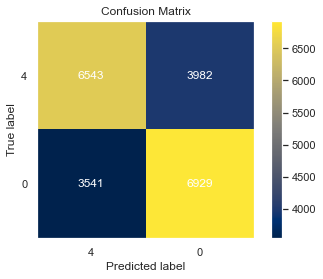

In [1368]:
plot_confusion_matrix(cmtrain_lr,['4','0'],False)

Confusion Matrix, without Normalization


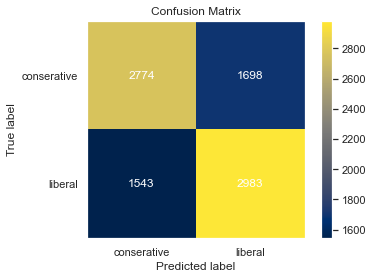

In [1369]:
plot_confusion_matrix(cmtest_lr,['conserative','liberal'],False)

The base model is not amazing, but there is very little overfitting. We will work through some parameters to attempt to optimize the model.

#### Optimization

##### Solver

In [1568]:
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
params = dict(solver=solver_list)
lr = LogisticRegression(C=8,n_jobs=-1,random_state=42)
clf = GridSearchCV(lr,params,cv=3)
clf.fit(X_train,y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f'{solver} {score:.3f}')

newton-cg 0.660
lbfgs 0.645
liblinear 0.660
sag 0.654
saga 0.646


It appears newton-cg and liblinear are the best solvers.

##### Penalty

In [1371]:
penalty_list = ['l2','none']
params = dict(penalty=penalty_list)
lr = LogisticRegression(C=8,solver='newton-cg',n_jobs=-1,random_state=42)
clf = GridSearchCV(lr,params,cv=3)
clf.fit(X_train,y_train)
scores = clf.cv_results_['mean_test_score']

for score, penalty in zip(scores, penalty_list):
    print(f'{penalty} {score:.3f}')

l2 0.655
none 0.690


It is clear that no penalty results in a higher test score.

In [1372]:
penalty_list = ['l2','l1','elasticnet','none']
params = dict(penalty=penalty_list)
lr = LogisticRegression(C=8,solver='saga',n_jobs=-1,random_state=42)
clf = GridSearchCV(lr,params,cv=3)
clf.fit(X_train,y_train)
scores = clf.cv_results_['mean_test_score']

for score, penalty in zip(scores, penalty_list):
    print(f'{penalty} {score:.3f}')

l2 0.644
l1 0.646
elasticnet nan
none 0.647


In [1373]:
penalty_list = ['l2','l1']
params = dict(penalty=penalty_list)
lr = LogisticRegression(C=1.0,solver='liblinear',n_jobs=-1,random_state=42)
clf = GridSearchCV(lr,params,cv=3)
clf.fit(X_train,y_train)
scores = clf.cv_results_['mean_test_score']

for score, penalty in zip(scores, penalty_list):
    print(f'{penalty} {score:.3f}')

l2 0.631
l1 0.639


##### C value

In [1374]:
# Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.05.
c_vals = np.arange(0.05,10.0,0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(solver='lbfgs',C=c,max_iter=1000,random_state=42)
    lr.fit(X_train,y_train)
    test_accuracy.append(lr.score(X_test,y_test))
    train_accuracy.append(lr.score(X_train,y_train))

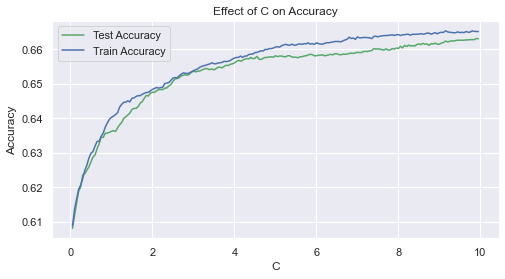

In [1375]:
# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. Select an appropriate value for C and explain why that may be the best value.
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(c_vals,test_accuracy,'-g',label='Test Accuracy')
ax1.plot(c_vals,train_accuracy,'-b',label='Train Accuracy')
ax1.set(xlabel='C',ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [1376]:
# Explore even higher values of C
c_vals = np.arange(2,15.0,0.5)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(solver='newton-cg',penalty='none',C=c,max_iter=10000,random_state=42)
    lr.fit(X_train,y_train)
    test_accuracy.append(lr.score(X_test,y_test))
    train_accuracy.append(lr.score(X_train,y_train))

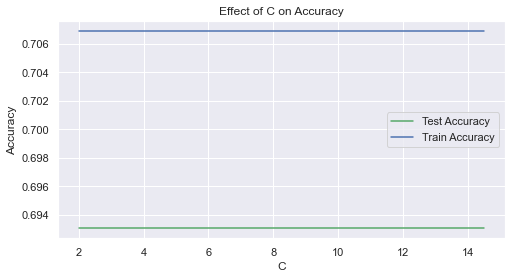

In [1377]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(c_vals,test_accuracy,'-g',label='Test Accuracy')
ax1.plot(c_vals,train_accuracy,'-b',label='Train Accuracy')
ax1.set(xlabel='C',ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

It makes obvious sense that when there is no penalty, the C-value does not affect the scores whatsover. It also appears that no penalty results in the highest train and test scores and also not too much overfitting

In [1378]:
c_vals = np.arange(10,50,0.5)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(solver='lbfgs',C=c,max_iter=10000,random_state=42)
    lr.fit(X_train,y_train)
    test_accuracy.append(lr.score(X_test,y_test))
    train_accuracy.append(lr.score(X_train,y_train))

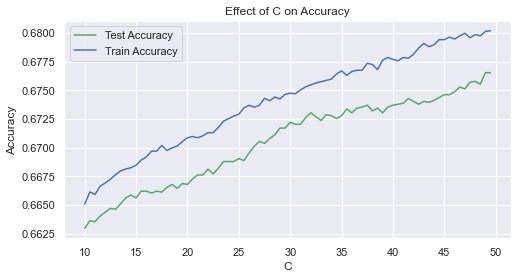

In [1379]:
# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. Select an appropriate value for C and explain why that may be the best value.
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(c_vals,test_accuracy,'-g',label='Test Accuracy')
ax1.plot(c_vals,train_accuracy,'-b',label='Train Accuracy')
ax1.set(xlabel='C',ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [1416]:
c_vals = np.arange(50,500,20)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(solver='lbfgs',C=c,max_iter=10000,random_state=42)
    lr.fit(X_train,y_train)
    test_accuracy.append(lr.score(X_test,y_test))
    train_accuracy.append(lr.score(X_train,y_train))

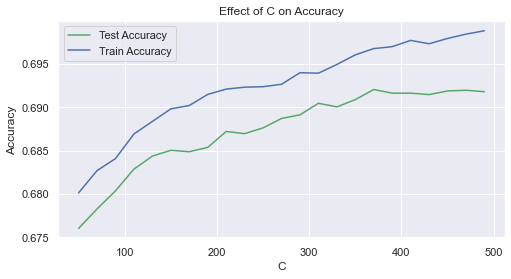

In [1417]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(c_vals,test_accuracy,'-g',label='Test Accuracy')
ax1.plot(c_vals,train_accuracy,'-b',label='Train Accuracy')
ax1.set(xlabel='C',ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

It finally appears that the test score is leveling off with the higher value of C.

The best Logistic Regression model is the model with the newton-cg solver and no regularizaiton. 

In [1413]:
# Best Logistic Regression Model:

lr_best = LogisticRegression(solver='newton-cg',max_iter=100000,random_state=123,penalty='none')
cmtrain_lr,cmtest_lr = run_evaluate_model(lr_best,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.7062633960466778
Precision: 0.6993421662188456
Recall: 0.7209169054441261
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6927094909979996
Precision: 0.6902138690861958
Recall: 0.705921343349536
----------------------------------------


Confusion Matrix, without Normalization


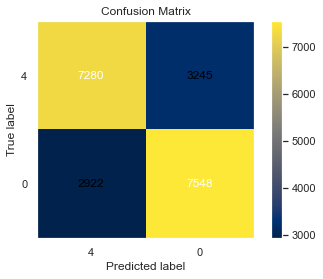

In [1381]:
plot_confusion_matrix(cmtrain_lr,['4','0'],False)

Confusion Matrix, without Normalization


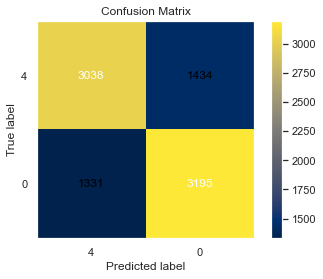

In [1382]:
plot_confusion_matrix(cmtest_lr,['4','0'],False)

##### Does Standardizing the Features Improve the Model?

This shows that standardizing the features does not affect the model.

In [1404]:
X_sc = StandardScaler().fit_transform(X)

In [1410]:
lr_sc = LogisticRegression(solver='newton-cg',max_iter=10000,random_state=123,penalty='none')
cmtrain_sc,cmtest_sc = run_evaluate_model(lr_sc,X_sc,Y)

Scores on Training Data:
--------------------
Accuracy: 0.7062633960466778
Precision: 0.6993421662188456
Recall: 0.7209169054441261
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6927094909979996
Precision: 0.6902138690861958
Recall: 0.705921343349536
----------------------------------------


### Random Forest

#### Base Model

In [1383]:
rfc = RandomForestClassifier()
cmtrain,cmtest = run_evaluate_model(rfc,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.995760895451298
Precision: 0.993440441106569
Recall: 0.9980897803247374
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6321404756612581
Precision: 0.6403508771929824
Recall: 0.6129032258064516
----------------------------------------


Confusion Matrix, without Normalization


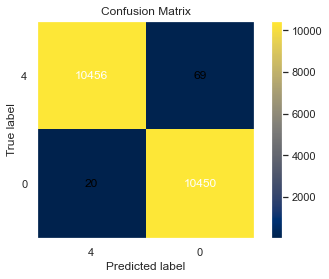

In [1384]:
plot_confusion_matrix(cmtrain,['4','0'],False)

Confusion Matrix, without Normalization


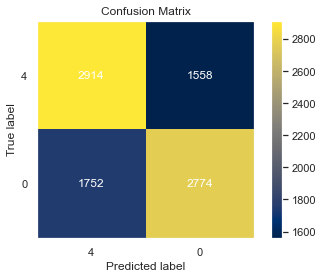

In [1385]:
plot_confusion_matrix(cmtest,['4','0'],False)

In [1406]:
pprint(rfc.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [1407]:
rfc_sc = RandomForestClassifier()
cmtrain_sc,cmtest_sc = run_evaluate_model(rfc_sc,X_sc,Y)

Scores on Training Data:
--------------------
Accuracy: 0.9958085258394855
Precision: 0.9932535157734702
Recall: 0.9983763132760267
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.624249833296288
Precision: 0.6310368505378805
Recall: 0.6091471498011489
----------------------------------------


It really does not appear that the data performs too much better when the training data is standardized.

#### Optimization

##### Grid Search Cross Validation for Hyperparameters

In [1246]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [25,30,40,50,100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,5],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)


In [1247]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 91.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 114.3min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [25, 30, 40, 50, 100],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [1248]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 300}

In [1249]:
best_grid_params = grid_search.best_params_

In [1250]:
rf_grid = RandomForestClassifier(**best_grid_params)

In [1334]:
cmtrain_grid,cmtest_grid = run_evaluate_model(rf_grid,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.9873303167420815
Precision: 0.9841525906244069
Recall: 0.9905444126074499
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6345854634363192
Precision: 0.6375555555555555
Recall: 0.6338930623066725
----------------------------------------


Sadly after a very long grid search process, our Random Forest Model is not any better.

Confusion Matrix, without Normalization


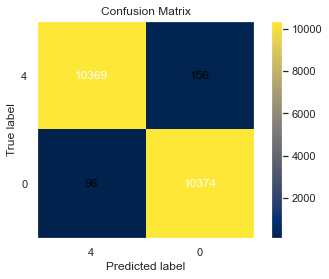

In [1261]:
plot_confusion_matrix(cmtrain,['4','0'],False)

Confusion Matrix, without Normalization


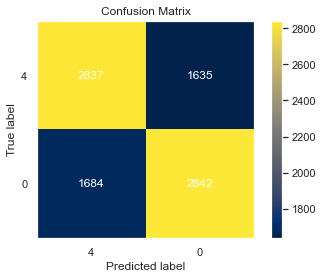

In [1260]:
plot_confusion_matrix(cmtest,['4','0'],False)

### Gradient Boosting Classifier

#### Base Model

In [1386]:
gb = GradientBoostingClassifier()
cmtrain_gb,cmtest_gb= run_evaluate_model(gb,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.6721124077161229
Precision: 0.6738750969743987
Recall: 0.6637058261700095
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6225827961769282
Precision: 0.6275395033860045
Recall: 0.6142288996906761
----------------------------------------


Confusion Matrix, without Normalization


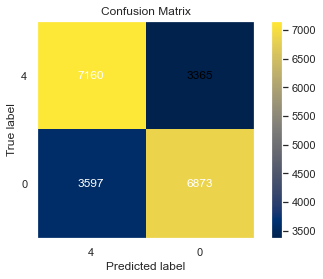

In [1336]:
plot_confusion_matrix(cmtrain_gb,['4','0'],False)

Confusion Matrix, without Normalization


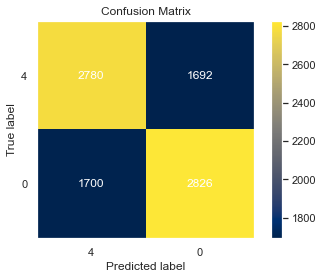

In [1337]:
plot_confusion_matrix(cmtest_gb,['4','0'],False)

In [1281]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

The gradient boosting base model is not awesome and there is some overfitting occurring. Below is a function to easily run the boost model and output the train and test scores, and we'll see how the various parameters affect these scores. 

#### Optimization

In [1282]:
def run_boost_model(x, y, params):
    # Create training and test sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.4,random_state=42)

    # Initiate and fit the model
    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train,y_train)

    # Predict outcomes for X_train and y_train
    # Save outcomes to variables
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    cmtest = confusion_matrix(y_test,predict_test)
    cmtrain = confusion_matrix(y_train,predict_train)

    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train,y_train)
    precision = cmtest[1][1] / (cmtest[1][1] + cmtest[0][1])
    recall = cmtest[1][1] / (cmtest[1][1] + cmtest[1][0])
    
    print('Train Accuracy: {}\nTest Accuracy: {}'.format(train_score,test_score))
    print('-'*20)
    print('Precision: {}'.format(precision))
    print('-'*20)
    print('Recall: {}'.format(recall))
    
    return train_score,test_score

##### Loss

In [1283]:
params={'loss':'exponential'}
_,_=run_boost_model(X,Y,params)

Train Accuracy: 0.6756321200333426
Test Accuracy: 0.6276046007667945
--------------------
Precision: 0.6386438332468432
--------------------
Recall: 0.6081370449678801


Exponential loss decreased both scores

##### Learning Rate

In [1284]:
train_scores_learningrate = []
test_scores_learningrate = []
learning_rates = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for learning_rate in learning_rates:
    params = {'learning_rate': learning_rate}
    print('Learning Rate = {}'.format(learning_rate))
    print('-'*40)
    train_score_lr,test_score_lr = run_boost_model(X,Y,params)
    print('-'*40)
    train_scores_learningrate.append(train_score_lr)
    test_scores_learningrate.append(test_score_lr)

Learning Rate = 0.1
----------------------------------------
Train Accuracy: 0.6764101139205335
Test Accuracy: 0.6248541423570595
--------------------
Precision: 0.6357661708751298
--------------------
Recall: 0.60550156481634
----------------------------------------
Learning Rate = 0.2
----------------------------------------
Train Accuracy: 0.7144206724090025
Test Accuracy: 0.6272712118686448
--------------------
Precision: 0.6391160605533321
--------------------
Recall: 0.6050074122879262
----------------------------------------
Learning Rate = 0.3
----------------------------------------
Train Accuracy: 0.7383161989441511
Test Accuracy: 0.6268544757459577
--------------------
Precision: 0.637130075705437
--------------------
Recall: 0.6099489375720639
----------------------------------------
Learning Rate = 0.4
----------------------------------------
Train Accuracy: 0.7515420950263962
Test Accuracy: 0.6236872812135356
--------------------
Precision: 0.6328098327074086
------------

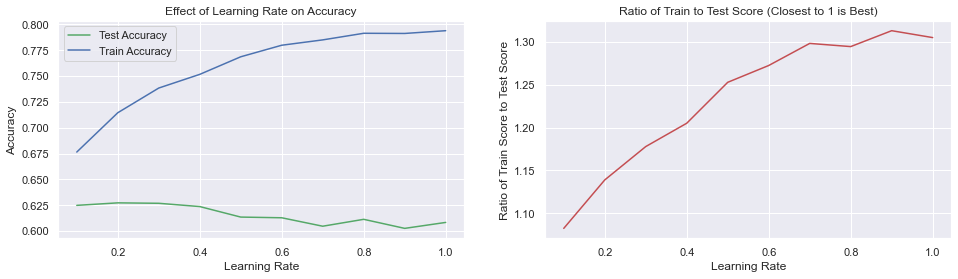

In [1285]:
ratio_learnrate = []

for i in range(len(test_scores_learningrate)):
    ratio_learnrate.append(train_scores_learningrate[i]/test_scores_learningrate[i])

# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(learning_rates,test_scores_learningrate,'-g',label='Test Accuracy')
ax1.plot(learning_rates,train_scores_learningrate,'-b',label='Train Accuracy')
ax1.set(xlabel='Learning Rate',ylabel='Accuracy')
ax1.set_title('Effect of Learning Rate on Accuracy')
ax1.legend()
ax2.plot(learning_rates,ratio_learnrate,'-r')
ax2.set(xlabel='Learning Rate',ylabel='Ratio of Train Score to Test Score')
ax2.set_title('Ratio of Train to Test Score (Closest to 1 is Best)')
plt.show()

WOW! Increasing the learning rate really just increases overfitting.

##### n-estimators

In [1288]:
test_accuracy_n = []
train_accuracy_n = []
n_estimators_list = np.arange(100,2000,100)
for n_estimators in n_estimators_list:
    params = {'n_estimators': n_estimators}
    print('-'*40)
    print('Estimator Number = {}'.format(n_estimators))
    print('-'*40)
    train_score_n,test_score_n = run_boost_model(X,Y,params)
    test_accuracy_n.append(test_score_n)
    train_accuracy_n.append(train_score_n)
    print('\n\n')

----------------------------------------
Estimator Number = 100
----------------------------------------
Train Accuracy: 0.6764101139205335
Test Accuracy: 0.6246874479079847
--------------------
Precision: 0.6356401384083045
--------------------
Recall: 0.6051721297973974



----------------------------------------
Estimator Number = 200
----------------------------------------
Train Accuracy: 0.7189219227563212
Test Accuracy: 0.6267711285214203
--------------------
Precision: 0.6370676303562209
--------------------
Recall: 0.6097842200625927



----------------------------------------
Estimator Number = 300
----------------------------------------
Train Accuracy: 0.7515420950263962
Test Accuracy: 0.6306884480746792
--------------------
Precision: 0.640362889421431
--------------------
Recall: 0.6162082029319716



----------------------------------------
Estimator Number = 400
----------------------------------------
Train Accuracy: 0.7788830230619617
Test Accuracy: 0.6301050175029171

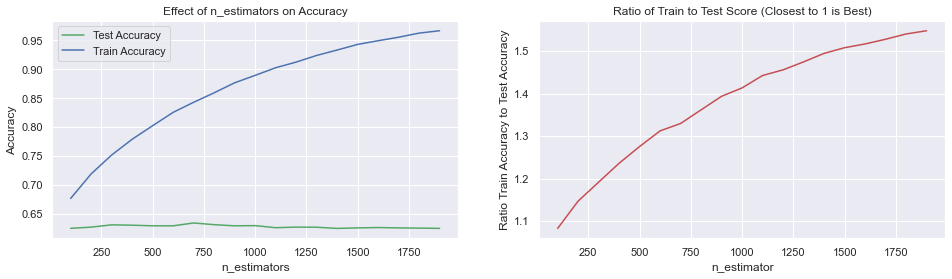

In [1289]:
ratio_n = []

for i in range(len(test_accuracy_n)):
    ratio_n.append(train_accuracy_n[i]/ test_accuracy_n[i])

# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(n_estimators_list,test_accuracy_n,'-g',label='Test Accuracy')
ax1.plot(n_estimators_list,train_accuracy_n,'-b',label='Train Accuracy')
ax1.set(xlabel='n_estimators',ylabel='Accuracy')
ax1.set_title('Effect of n_estimators on Accuracy')
ax1.legend()
ax2.plot(n_estimators_list,ratio_n,'-r')
ax2.set(xlabel='n_estimator',ylabel='Ratio Train Accuracy to Test Accuracy')
ax2.set_title('Ratio of Train to Test Score (Closest to 1 is Best)')
plt.show()

Similar case here. Increasing n_estimators does nothing but overfits.

##### Subsample

In [1290]:
train_accuracy_sub = []
test_accuracy_sub = []
subsamples = np.arange(.5,1.01,.1)
for subsample in subsamples:
    params = {'subsample':subsample}
    print('-'*40)
    print('Subsample Param = {}'.format(subsample))
    print('-'*40)
    train_sub, test_sub = run_boost_model(X,Y,params)
    train_accuracy_sub.append(train_sub)
    test_accuracy_sub.append(test_sub)
    print('\n')

----------------------------------------
Subsample Param = 0.5
----------------------------------------
Train Accuracy: 0.6754098360655738
Test Accuracy: 0.6266877812968829
--------------------
Precision: 0.6385311521058128
--------------------
Recall: 0.6043485422500412



----------------------------------------
Subsample Param = 0.6
----------------------------------------
Train Accuracy: 0.6817449291469853
Test Accuracy: 0.6277712952158693
--------------------
Precision: 0.637109174782163
--------------------
Recall: 0.6142315928183166



----------------------------------------
Subsample Param = 0.7
----------------------------------------
Train Accuracy: 0.6802445123645458
Test Accuracy: 0.6262710451741957
--------------------
Precision: 0.6379760041731872
--------------------
Recall: 0.6043485422500412



----------------------------------------
Subsample Param = 0.7999999999999999
----------------------------------------
Train Accuracy: 0.6784662406223951
Test Accuracy: 0.62627

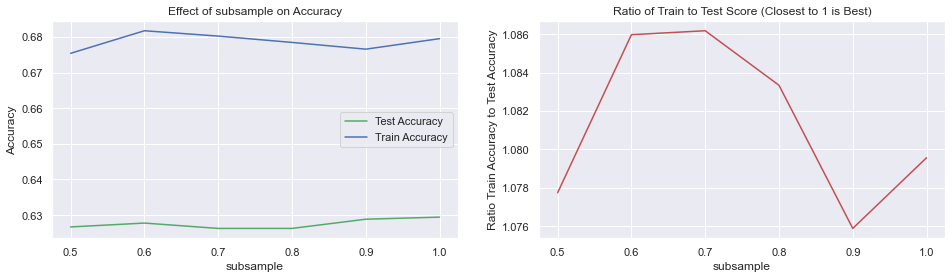

In [1291]:
ratio_sub = []

for i in range(len(test_accuracy_sub)):
    ratio_sub.append(train_accuracy_sub[i]/ test_accuracy_sub[i])

# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(subsamples,test_accuracy_sub,'-g',label='Test Accuracy')
ax1.plot(subsamples,train_accuracy_sub,'-b',label='Train Accuracy')
ax1.set(xlabel='subsample',ylabel='Accuracy')
ax1.set_title('Effect of subsample on Accuracy')
ax1.legend()
ax2.plot(subsamples,ratio_sub,'-r')
ax2.set(xlabel='subsample',ylabel='Ratio Train Accuracy to Test Accuracy')
ax2.set_title('Ratio of Train to Test Score (Closest to 1 is Best)')
plt.show()

Got nothing here! 

##### Max Depth

In [1293]:
test_accuracy_depth = []
train_accuracy_depth = []
max_depths = np.arange(1,25,1)
for max_depth in max_depths:
    params = {'max_depth': max_depth}
    print('Max Depth = {}'.format(max_depth))
    print('-'*40)
    train_depth, test_depth=run_boost_model(X,Y,params)
    print('-'*40)
    test_accuracy_depth.append(test_depth)
    train_accuracy_depth.append(train_depth)

Max Depth = 1
----------------------------------------
Train Accuracy: 0.6120033342595166
Test Accuracy: 0.5978496416069344
--------------------
Precision: 0.6122522522522522
--------------------
Recall: 0.5597100971833305
----------------------------------------
Max Depth = 2
----------------------------------------
Train Accuracy: 0.6421783828841345
Test Accuracy: 0.6171028504750792
--------------------
Precision: 0.6284571229779092
--------------------
Recall: 0.5951243617196508
----------------------------------------
Max Depth = 3
----------------------------------------
Train Accuracy: 0.6764101139205335
Test Accuracy: 0.6246874479079847
--------------------
Precision: 0.6356401384083045
--------------------
Recall: 0.6051721297973974
----------------------------------------
Max Depth = 4
----------------------------------------
Train Accuracy: 0.7316476799110864
Test Accuracy: 0.6355225870978496
--------------------
Precision: 0.6466827919834139
--------------------
Recall: 0.61

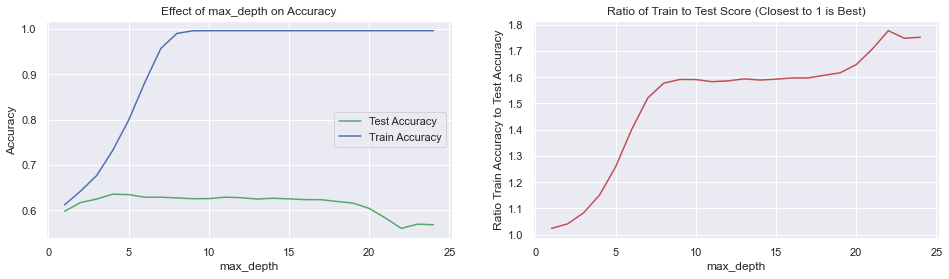

In [1294]:
ratio_depth = []

for i in range(len(test_accuracy_depth)):
    ratio_depth.append(train_accuracy_depth[i]/ test_accuracy_depth[i])

# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(max_depths,test_accuracy_depth,'-g',label='Test Accuracy')
ax1.plot(max_depths,train_accuracy_depth,'-b',label='Train Accuracy')
ax1.set(xlabel='max_depth',ylabel='Accuracy')
ax1.set_title('Effect of max_depth on Accuracy')
ax1.legend()
ax2.plot(max_depths,ratio_depth,'-r')
ax2.set(xlabel='max_depth',ylabel='Ratio Train Accuracy to Test Accuracy')
ax2.set_title('Ratio of Train to Test Score (Closest to 1 is Best)')
plt.show()

Overfitting! Overfitting everywhere!

##### Min Samples Split

In [1295]:
test_accuracy_split = []
train_accuracy_split = []
splits = [2,4,6,8,10,20,40,60,100]
for split in splits:
    params = {'min_samples_split':split}
    print('Min Samples Split = {}'.format(split))
    print('-'*40)
    train_split,test_split = run_boost_model(X,Y,params)
    print('-'*40)
    test_accuracy_split.append(test_split)
    train_accuracy_split.append(train_split)

Min Samples Split = 2
----------------------------------------
Train Accuracy: 0.6764101139205335
Test Accuracy: 0.6246874479079847
--------------------
Precision: 0.6356401384083045
--------------------
Recall: 0.6051721297973974
----------------------------------------
Min Samples Split = 4
----------------------------------------
Train Accuracy: 0.6764101139205335
Test Accuracy: 0.6246041006834473
--------------------
Precision: 0.635530185089085
--------------------
Recall: 0.6051721297973974
----------------------------------------
Min Samples Split = 6
----------------------------------------
Train Accuracy: 0.6764656849124757
Test Accuracy: 0.6246041006834473
--------------------
Precision: 0.6355770894618447
--------------------
Recall: 0.6050074122879262
----------------------------------------
Min Samples Split = 8
----------------------------------------
Train Accuracy: 0.6774103917754932
Test Accuracy: 0.6254375729288215
--------------------
Precision: 0.6361595579347263
--

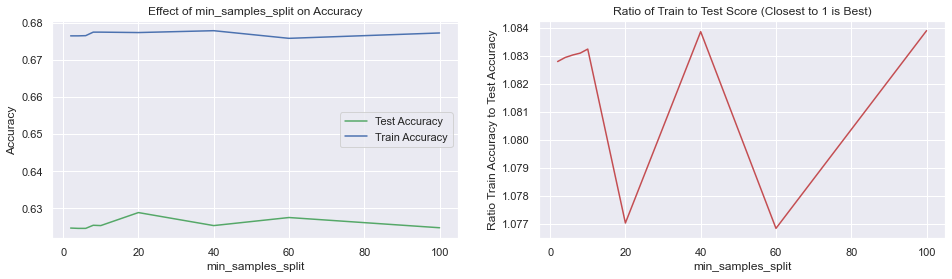

In [1296]:
ratio_split = []

for i in range(len(test_accuracy_split)):
    ratio_split.append(train_accuracy_split[i]/ test_accuracy_split[i])

# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(splits,test_accuracy_split,'-g',label='Test Accuracy')
ax1.plot(splits,train_accuracy_split,'-b',label='Train Accuracy')
ax1.set(xlabel='min_samples_split',ylabel='Accuracy')
ax1.set_title('Effect of min_samples_split on Accuracy')
ax1.legend()
ax2.plot(splits,ratio_split,'-r')
ax2.set(xlabel='min_samples_split',ylabel='Ratio Train Accuracy to Test Accuracy')
ax2.set_title('Ratio of Train to Test Score (Closest to 1 is Best)')
plt.show()

Nothing. Nothing here.

##### Min Samples Leaf

In [1299]:
min_samples_leafs = [1,10,20,50,100,200,300]

test_accuracy_leaf = []
train_accuracy_leaf = []
for leaf in min_samples_leafs:
    params = {'min_samples_leaf': leaf}
    print('Min Samples Leaf = {}'.format(leaf))
    print('-'*40)
    train_leaf,test_leaf = run_boost_model(X,Y,params)
    print('-'*40)
    test_accuracy_leaf.append(test_leaf)
    train_accuracy_leaf.append(train_leaf)

Min Samples Leaf = 1
----------------------------------------
Train Accuracy: 0.6764101139205335
Test Accuracy: 0.6246874479079847
--------------------
Precision: 0.6356401384083045
--------------------
Recall: 0.6051721297973974
----------------------------------------
Min Samples Leaf = 10
----------------------------------------
Train Accuracy: 0.6764101139205335
Test Accuracy: 0.626937822970495
--------------------
Precision: 0.6367689933116104
--------------------
Recall: 0.6115961126667765
----------------------------------------
Min Samples Leaf = 20
----------------------------------------
Train Accuracy: 0.6784106696304529
Test Accuracy: 0.62710451741957
--------------------
Precision: 0.6371757429994847
--------------------
Recall: 0.6109372426288915
----------------------------------------
Min Samples Leaf = 50
----------------------------------------
Train Accuracy: 0.6740205612670186
Test Accuracy: 0.6263543923987331
--------------------
Precision: 0.637085635359116
------

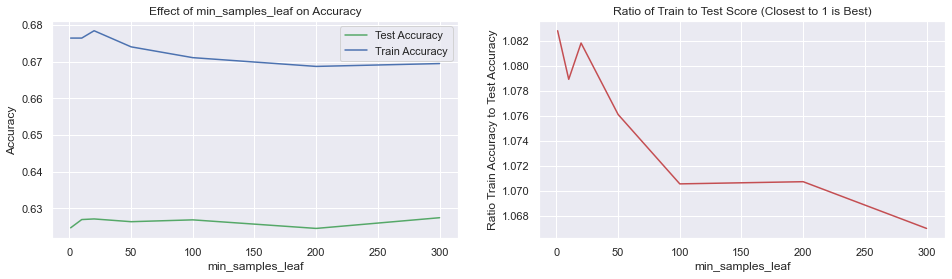

In [1300]:
ratio_leaf = []

for i in range(len(test_accuracy_leaf)):
    ratio_leaf.append(train_accuracy_leaf[i]/ test_accuracy_leaf[i])

# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(min_samples_leafs,test_accuracy_leaf,'-g',label='Test Accuracy')
ax1.plot(min_samples_leafs,train_accuracy_leaf,'-b',label='Train Accuracy')
ax1.set(xlabel='min_samples_leaf',ylabel='Accuracy')
ax1.set_title('Effect of min_samples_leaf on Accuracy')
ax1.legend()
ax2.plot(min_samples_leafs,ratio_leaf,'-r')
ax2.set(xlabel='min_samples_leaf',ylabel='Ratio Train Accuracy to Test Accuracy')
ax2.set_title('Ratio of Train to Test Score (Closest to 1 is Best)')
plt.show()

#### Grid Search for Hyperparameters

In [1303]:
# Create the parameter grid
param_grid = {
    'loss': ['deviance'],
    'learning_rate':[.1,.3,.5,.7,.9],
    'subsample':[.1,.3,.5,.7,.9],
    'max_features':[None,2,10,50],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
gb_grid = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb_grid, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [1304]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 400 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 68.9min finished


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'loss': ['deviance'],
                         'max_features': [None, 2, 10, 50],
                         'n_estimators': [100, 200, 300, 1000],
                         'subsample': [0.1, 0.3, 0.5, 0.7, 0.9]},
             verbose=2)

In [1387]:
grid_search.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_features': None,
 'n_estimators': 200,
 'subsample': 0.7}

In [1388]:
gb_best_params = grid_search.best_params_
gb_best = GradientBoostingClassifier(**gb_best_params)

In [1389]:
cmtrain_bestgb,cmtest_bestgb = run_evaluate_model(gb_best,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.7100261967135032
Precision: 0.7127184466019417
Recall: 0.7011461318051576
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6325850188930874
Precision: 0.6362823949955317
Recall: 0.6292532037118869
----------------------------------------


Unfortunately the grid search yielded unsatisfactory results.

We'll experiment with shrinkage and subsampling, which when used in conjunction can sometimes improve model performance.

In [1391]:
params3 = {'learning_rate': 0.1,
 'loss': 'deviance',
 'max_features': 2,
 'n_estimators': 200,
 'subsample': 1.0}
gb3 = GradientBoostingClassifier(**params3)
cmtrain_3,cmtest_3 = run_evaluate_model(gb3,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.6681590854965468
Precision: 0.6703296703296703
Recall: 0.6583572110792741
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6130251166925984
Precision: 0.6194508009153318
Recall: 0.5980998674326116
----------------------------------------


In [1396]:
params4 = {'learning_rate': 0.1,
 'loss': 'deviance',
 'max_features': None,
 'n_estimators': 1000,
 'subsample': 0.5}
gb4 = GradientBoostingClassifier(**params4)
cmtrain_4,cmtest_4 = run_evaluate_model(gb4,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.8568706834960705
Precision: 0.8580335731414868
Recall: 0.8543457497612226
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6306957101578129
Precision: 0.633874916536835
Recall: 0.6292532037118869
----------------------------------------


Sadly shrinkage and lower subsample with more n_estimators (which is often known to be robust against overfitting) just increases overfitting and does nothing to improve the test score. 

## Does SpaCy result in a better model?

Previously after cleaning, I prepared the data for vectorization by hand, but I'm also interested in seeing how the models perform when the text is processed with spacy.

### Text Cleaning

In [1437]:
data_for_spacy = pd.concat([model_data_4,model_data_0],axis=0,ignore_index=True)

In [1438]:
data_for_spacy.head()

,0,1,2,3,4,5
0,4,1880606122,Fri May 22 01:50:35 PDT 2009,NO_QUERY,ChantaeH,@taylorswift13 I am too!!! Haha it's so annoyi...
1,4,1981146808,Sun May 31 08:31:24 PDT 2009,NO_QUERY,24cotton,@myleee good night! i look forward to reading ...
2,4,2058465038,Sat Jun 06 14:59:57 PDT 2009,NO_QUERY,owieh,Link: Be Photogenic - I think this is very use...
3,4,1970511017,Sat May 30 04:09:37 PDT 2009,NO_QUERY,pob34,@TraceyHewins yes thanks for the recommendatio...
4,4,1997930139,Mon Jun 01 17:42:11 PDT 2009,NO_QUERY,diannysaiko,Blink 182 next Tuesday! omg I can't wait! X] ...


In [1440]:
data_for_spacy.shape

(30000, 6)

In [1441]:
value_error_idxs = []
for i,tweet in enumerate(data_for_spacy['5']):
    try:
        tweet_words = data_for_spacy.loc[i,'5'].split(sep=' ')
        
        for word in tweet_words:
            if '@' in word:
                tweet_words.remove(word)
            elif '-' in word:
                tweet_words.remove(word)
            elif 'http' in word:
                tweet_words.remove(word)
    
        cleaned_words = []
        for word in tweet_words:
            cleaned_words.append(word.replace('#',''))
    
        final_string = convert_emoticons(' '.join(cleaned_words)).strip()
    
        data_for_spacy.loc[i,'5'] = final_string.strip()
    
        if i % 1000 == 0:
            print('Cleaned Through Index {}! {}% of the way through!'.format(i,i*100/30000))
    
    except ValueError:
        print('Value Error at Index {}'.format(i))
        value_error_idxs.append(i)
        continue

Cleaned Through Index 0! 0.0% of the way through!
Cleaned Through Index 1000! 3.3333333333333335% of the way through!
Cleaned Through Index 2000! 6.666666666666667% of the way through!
Cleaned Through Index 3000! 10.0% of the way through!
Cleaned Through Index 4000! 13.333333333333334% of the way through!
Cleaned Through Index 5000! 16.666666666666668% of the way through!
Cleaned Through Index 6000! 20.0% of the way through!
Cleaned Through Index 7000! 23.333333333333332% of the way through!
Cleaned Through Index 8000! 26.666666666666668% of the way through!
Cleaned Through Index 9000! 30.0% of the way through!
Cleaned Through Index 10000! 33.333333333333336% of the way through!
Cleaned Through Index 11000! 36.666666666666664% of the way through!
Cleaned Through Index 12000! 40.0% of the way through!
Cleaned Through Index 13000! 43.333333333333336% of the way through!
Cleaned Through Index 14000! 46.666666666666664% of the way through!
Cleaned Through Index 15000! 50.0% of the way thro

In [1442]:
for i in range(len(data_for_spacy)-1):
    data_for_spacy.loc[i,'5'] = re.sub(r"&lt;3", "love ", data_for_spacy.loc[i,'5'])
    data_for_spacy.loc[i,'5'] = re.sub(r"½|¿|ï|&quot;|~|â|«|&lt;a&gt;", "", data_for_spacy.loc[i,'5'])
    data_for_spacy.loc[i,'5'] = re.sub(r"xxxx", " ", data_for_spacy.loc[i,'5'])
    data_for_spacy.loc[i,'5'] = re.sub(r"&amp;", " and ", data_for_spacy.loc[i,'5'])
    data_for_spacy.loc[i,'5'] = re.sub(r"Â´", "'", data_for_spacy.loc[i,'5'])
    data_for_spacy.loc[i,'5'] = re.sub(r"PokÃ©mon", "Pokemon", data_for_spacy.loc[i,'5'])
    data_for_spacy.loc[i,'5'] = data_for_spacy.loc[i,'5'].replace('...',' ')
    
    if i % 1000 == 0:
        print('Cleaned through index {}! {}% of the way through!'.format(i,round(i*100/30000,1)))

Cleaned through index 0! 0.0% of the way through!
Cleaned through index 1000! 3.3% of the way through!
Cleaned through index 2000! 6.7% of the way through!
Cleaned through index 3000! 10.0% of the way through!
Cleaned through index 4000! 13.3% of the way through!
Cleaned through index 5000! 16.7% of the way through!
Cleaned through index 6000! 20.0% of the way through!
Cleaned through index 7000! 23.3% of the way through!
Cleaned through index 8000! 26.7% of the way through!
Cleaned through index 9000! 30.0% of the way through!
Cleaned through index 10000! 33.3% of the way through!
Cleaned through index 11000! 36.7% of the way through!
Cleaned through index 12000! 40.0% of the way through!
Cleaned through index 13000! 43.3% of the way through!
Cleaned through index 14000! 46.7% of the way through!
Cleaned through index 15000! 50.0% of the way through!
Cleaned through index 16000! 53.3% of the way through!
Cleaned through index 17000! 56.7% of the way through!
Cleaned through index 1800

In [1444]:
remove_idxs = []
for i in range(len(data_for_spacy)-1):
    
    if 'Ð' in data_for_spacy.loc[i,'5']:
        remove_idxs.append(i)
remove_idxs

[52, 5575, 7968, 10968, 19261, 19455, 22060]

In [1445]:
data_for_spacy = data_for_spacy.drop(remove_idxs,axis=0).reset_index()
data_for_spacy.shape

(29993, 7)

In [1446]:
for i,tweet in enumerate(data_for_spacy['5']):
    
    word_list = tweet.split()
    
    cleaned_words = []
    for word in word_list:
        if '@' not in word:
            if 'http' not in word:
                if 'www' not in word:
                    cleaned_words.append(word)
    
    final_string = ' '.join(cleaned_words)
    
    data_for_spacy.loc[i,'5'] = final_string

In [1447]:
data_for_spacy['5'].head()

0    I am too!!! Haha it's so annoying! Nocturnals ...
1    good night! i look forward to reading your twe...
2    Link: Be Photogenic I think this is very usefu...
3    yes thanks for the recommendation, he told me ...
4    Blink 182 next Tuesday! omg I can't wait! X] t...
Name: 5, dtype: object

### Text Processing

In [1421]:
nlp=spacy.load('en')

In [1478]:
processed_model_text = []
for i,tweet in enumerate(data_for_spacy['5']):
    tweet_doc = nlp(tweet)
    tweet_doc_no_punct_no_stop = [token.lemma_ for token in tweet_doc if not token.is_punct and not token.is_stop]
    final_tweet = []
    for token in tweet_doc_no_punct_no_stop:
        if len(token) > 1:
            if '.com' not in token:
                final_tweet.append(token.lower())
    processed_model_text.append(final_tweet)
    
    if i % 1000 == 0:
        print('Processed through index {}! {}% of the way through!'.format(i,round(i*100/data_for_spacy.shape[0],1)))
    

Processed through index 0! 0.0% of the way through!
Processed through index 1000! 3.3% of the way through!
Processed through index 2000! 6.7% of the way through!
Processed through index 3000! 10.0% of the way through!
Processed through index 4000! 13.3% of the way through!
Processed through index 5000! 16.7% of the way through!
Processed through index 6000! 20.0% of the way through!
Processed through index 7000! 23.3% of the way through!
Processed through index 8000! 26.7% of the way through!
Processed through index 9000! 30.0% of the way through!
Processed through index 10000! 33.3% of the way through!
Processed through index 11000! 36.7% of the way through!
Processed through index 12000! 40.0% of the way through!
Processed through index 13000! 43.3% of the way through!
Processed through index 14000! 46.7% of the way through!
Processed through index 15000! 50.0% of the way through!
Processed through index 16000! 53.3% of the way through!
Processed through index 17000! 56.7% of the way

In [1479]:
data_for_spacy['model_text'] = processed_model_text

In [1484]:
data_for_spacy.head()

,index,0,1,2,3,4,5,model_text
0,0,4,1880606122,Fri May 22 01:50:35 PDT 2009,NO_QUERY,ChantaeH,I am too!!! Haha it's so annoying! Nocturnals ...,"[haha, annoying, nocturnal, life]"
1,1,4,1981146808,Sun May 31 08:31:24 PDT 2009,NO_QUERY,24cotton,good night! i look forward to reading your twe...,"[good, night, look, forward, read, tweet, life..."
2,2,4,2058465038,Sat Jun 06 14:59:57 PDT 2009,NO_QUERY,owieh,Link: Be Photogenic I think this is very usefu...,"[link, photogenic, think, useful]"
3,3,4,1970511017,Sat May 30 04:09:37 PDT 2009,NO_QUERY,pob34,"yes thanks for the recommendation, he told me ...","[yes, thank, recommendation, tell, thank]"
4,4,4,1997930139,Mon Jun 01 17:42:11 PDT 2009,NO_QUERY,diannysaiko,Blink 182 next Tuesday! omg I can't wait! X] t...,"[blink, 182, tuesday, omg, wait, thank]"


In [1485]:
data_for_spacy['rating'] = data_for_spacy['0']
data_for_spacy['tweet_id'] = data_for_spacy['1']
data_for_spacy['og_text'] = data_for_spacy['5']
data_for_spacy.drop(['index','0','1','2','3','4','5'],axis=1,inplace=True)
data_for_spacy.head()

,model_text,rating,tweet_id,og_text
0,"[haha, annoying, nocturnal, life]",4,1880606122,I am too!!! Haha it's so annoying! Nocturnals ...
1,"[good, night, look, forward, read, tweet, life...",4,1981146808,good night! i look forward to reading your twe...
2,"[link, photogenic, think, useful]",4,2058465038,Link: Be Photogenic I think this is very usefu...
3,"[yes, thank, recommendation, tell, thank]",4,1970511017,"yes thanks for the recommendation, he told me ..."
4,"[blink, 182, tuesday, omg, wait, thank]",4,1997930139,Blink 182 next Tuesday! omg I can't wait! X] t...


### Vectorization of Text

In [1487]:
model = gensim.models.Word2Vec(
    data_for_spacy["model_text"],
    workers=4, # set number of threads in parallel to 4
    min_count=1, # set the min word count threshold to 1
    window=4, # set the number of words around the target to consider to be 6
    sg=0, # use cbow because the corpus is small
    sample=1e-3, # penalize frequent words
    size=300, # set the word vector length to 300
    hs=1
)

word2vec_arr = np.zeros((data_for_spacy.shape[0],300))

for i, sentence in enumerate(data_for_spacy['model_text']):
    word2vec_arr[i,:] = np.mean([model[lemma] for lemma in sentence],axis=0)

word2vec_arr = pd.DataFrame(word2vec_arr)
spacy_model = pd.concat([data_for_spacy[['rating','tweet_id','og_text','model_text']],word2vec_arr],axis=1)
spacy_model.dropna(inplace=True)

spacy_model.head()

,rating,tweet_id,og_text,model_text,0,1,2,3,4,5,...,290,291,292,293,294,295,296,297,298,299
0,4,1880606122,I am too!!! Haha it's so annoying! Nocturnals ...,"[haha, annoying, nocturnal, life]",0.017204,0.026728,0.097323,0.040219,0.089809,-0.082311,...,-0.176307,-0.257238,-0.218922,-0.109848,0.032966,-0.187192,0.222527,0.128647,0.005080,-0.172116
1,4,1981146808,good night! i look forward to reading your twe...,"[good, night, look, forward, read, tweet, life...",0.095343,0.007151,0.164891,-0.003753,0.137453,-0.168710,...,-0.348778,-0.288637,-0.529191,-0.185795,-0.108175,-0.246836,0.333911,0.125054,0.024774,-0.356664
2,4,2058465038,Link: Be Photogenic I think this is very usefu...,"[link, photogenic, think, useful]",-0.006927,0.028471,0.084633,0.038455,0.078091,-0.053578,...,-0.145041,-0.213675,-0.186577,-0.078779,0.041619,-0.129891,0.167658,0.096199,0.035001,-0.125114
3,4,1970511017,"yes thanks for the recommendation, he told me ...","[yes, thank, recommendation, tell, thank]",0.041323,0.092264,0.025995,-0.074356,0.203165,-0.070691,...,-0.142769,-0.301143,-0.369972,-0.098305,0.042437,-0.194964,0.286172,0.122180,-0.004742,-0.218406
4,4,1997930139,Blink 182 next Tuesday! omg I can't wait! X] t...,"[blink, 182, tuesday, omg, wait, thank]",0.019373,-0.057377,0.118859,0.049156,0.099125,-0.064327,...,-0.178131,-0.223415,-0.250522,-0.172977,0.029341,-0.188079,0.241235,0.139405,0.003977,-0.105968


### Models

In [1793]:
Y = spacy_model['rating']
X = spacy_model.drop(['rating','tweet_id','og_text','model_text'], 1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

In [1488]:
# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.633914066438855

Test set score: 0.6361955973785919
----------------------Random Forest Scores----------------------
Training set score: 0.9958545739734469

Test set score: 0.632750798185179
----------------------Gradient Boosting Scores----------------------
Training set score: 0.6835471402162344

Test set score: 0.6345992270206688


So far it appears that the models with data parsed with SpaCy does not necessarily perform any better. Let's try our best performing models so far with the SpaCy data, the Logistic Regression models with no penalties. 

#### Logistic Regression

In [1794]:
lr = LogisticRegression(solver='lbfgs',max_iter=100000,random_state=123,penalty='none')
_,_= run_evaluate_model(lr,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.7115283046045998
Precision: 0.7057490795808553
Recall: 0.7211343686698177
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.7012099484651579
Precision: 0.7021510096575944
Recall: 0.7094699489909071
----------------------------------------


In [1795]:
lr = LogisticRegression(solver='newton-cg',max_iter=100000,random_state=123,penalty='none')
_,_= run_evaluate_model(lr,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.711720362990349
Precision: 0.7060545952583357
Recall: 0.7210379087489148
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.70177010979162
Precision: 0.7021230028452615
Recall: 0.711465956974939
----------------------------------------


#### Random Forest

In [1796]:
best_rf_params = {'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 300}

In [1797]:
rf = RandomForestClassifier(**best_rf_params)
_,_=run_evaluate_model(rf,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.9864118692082393
Precision: 0.984062980030722
Recall: 0.9887141892543648
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6361192023302711
Precision: 0.6479005395261553
Recall: 0.612552672432912
----------------------------------------


We'll see if n_estimators with a very low max_depth can help raise the performance now that lowering the max_depth seems to prevent overfitting. 

In [1549]:
n_estimators_list = [200,500,1000,1500,2000,3000,4000,5000]
rf_train_scores = []
rf_test_scores = []
for n in n_estimators_list:
    params = {'bootstrap': True,
              'max_depth': 5,
              'max_features': 'sqrt',
              'min_samples_leaf': 5,
              'min_samples_split': 7,
              'n_estimators': n}
    rf = RandomForestClassifier(**params)
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
    rf.fit(X_train,y_train)
    
    # Predict outcomes for X_train and y_train
    # Save outcomes to variables
    predict_train = rf.predict(X_train)
    predict_test = rf.predict(X_test)
    
    # Create Confusion Matrices
    cmtrain = confusion_matrix(y_train,predict_train)
    cmtest = confusion_matrix(y_test,predict_test)

    # Calculate and print the accuracy of the model on the test data.
    test_score = rf.score(X_test,y_test)
    train_score = rf.score(X_train,y_train)
    test_precision = cmtest[1][1] / (cmtest[1][1] + cmtest[0][1])
    train_precision = cmtrain[1][1] / (cmtrain[1][1] + cmtrain[0][1])
    train_recall = cmtrain[1][1] / (cmtrain[1][1] + cmtrain[1][0])
    test_recall = cmtest[1][1] / (cmtest[1][1] + cmtest[1][0])
    
    print('n_estimator: {}'.format(n))
    print('-'*40)
    print('Scores on Training Data:')
    print('-'*20)
    print('Accuracy: {}\nPrecision: {}\nRecall: {}'.format(train_score,train_precision,train_recall))
    print('-'*40)
    print('Scores on Test Data:')
    print('-'*20)
    print('Accuracy: {}\nPrecision: {}\nRecall: {}'.format(test_score,test_precision,test_recall))
    print('-'*40)
    print('\n')
    
    rf_train_scores.append(train_score)
    rf_test_scores.append(test_score)

n_estimator: 200
----------------------------------------
Scores on Training Data:
--------------------
Accuracy: 0.6344648773227061
Precision: 0.6496088657105606
Recall: 0.576733867078229
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6170737172305624
Precision: 0.6373709393099974
Recall: 0.561321800842759
----------------------------------------


n_estimator: 500
----------------------------------------
Scores on Training Data:
--------------------
Accuracy: 0.6321121620972776
Precision: 0.6484795257437699
Recall: 0.5697887527732227
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.6150571364552991
Precision: 0.6368971676448073
Recall: 0.5535595475715236
----------------------------------------


n_estimator: 1000
----------------------------------------
Scores on Training Data:
--------------------
Accuracy: 0.632928410236712
Precision: 0.6492651897345909
Recall: 0.57104273174496
----------

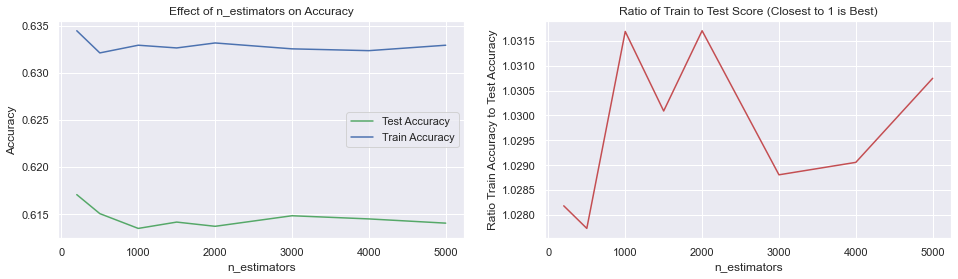

In [1588]:
ratio_n_rf = []

for i in range(len(rf_train_scores)):
    ratio_n_rf.append(rf_train_scores[i]/ rf_test_scores[i])

# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot([200,500,1000,1500,2000,3000,4000,5000],rf_test_scores,'-g',label='Test Accuracy')
ax1.plot([200,500,1000,1500,2000,3000,4000,5000],rf_train_scores,'-b',label='Train Accuracy')
ax1.set(xlabel='n_estimators',ylabel='Accuracy')
ax1.set_title('Effect of n_estimators on Accuracy')
ax1.legend()
ax2.plot([200,500,1000,1500,2000,3000,4000,5000],ratio_n_rf,'-r')
ax2.set(xlabel='n_estimators',ylabel='Ratio Train Accuracy to Test Accuracy')
ax2.set_title('Ratio of Train to Test Score (Closest to 1 is Best)')
plt.show()

Unfortunately increasing n_estimators does not improve model accuracy but it also does not increase overfitting in any way. Perhaps it may be possible to improve the accuracy of this Random Forest through some fine tuning or more data, but we will leave that for the 2.0 of the model. 

#### Gradient Boosting

In [1589]:
params = {'learning_rate': 0.1,
          'max_depth':2,
          'loss': 'deviance',
          'max_features': 'sqrt',
          'n_estimators': 1000,
          'subsample': 0.5}
gb = GradientBoostingClassifier(**params)
_,_ = run_evaluate_model(gb,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.724732318624862
Precision: 0.7382764294529001
Recall: 0.6924857721616668
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.632198073045037
Precision: 0.6463007159904535
Recall: 0.6005766245287203
----------------------------------------


In [1550]:
train_scores_learningrate = []
test_scores_learningrate = []
learning_rates = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for learning_rate in learning_rates:
    params = {'learning_rate': learning_rate,
          'max_depth':2,
          'loss': 'deviance',
          'max_features': 'sqrt',
          'n_estimators': 1000,
          'subsample': 0.5}
    print('Learning Rate = {}'.format(learning_rate))
    print('-'*40)
    train_score_lr,test_score_lr = run_boost_model(X,Y,params)
    print('-'*40)
    train_scores_learningrate.append(train_score_lr)
    test_scores_learningrate.append(test_score_lr)

Learning Rate = 0.1
----------------------------------------
Train Accuracy: 0.7372696207495378
Test Accuracy: 0.6267854142160981
--------------------
Precision: 0.6356942496493688
--------------------
Recall: 0.6053422370617696
----------------------------------------
Learning Rate = 0.2
----------------------------------------
Train Accuracy: 0.7786678617444401
Test Accuracy: 0.6277936481263653
--------------------
Precision: 0.636411332633788
--------------------
Recall: 0.6075125208681135
----------------------------------------
Learning Rate = 0.3
----------------------------------------
Train Accuracy: 0.7987787799002857
Test Accuracy: 0.6210720887245841
--------------------
Precision: 0.6292802236198463
--------------------
Recall: 0.6013355592654424
----------------------------------------
Learning Rate = 0.4
----------------------------------------
Train Accuracy: 0.8149123298414654
Test Accuracy: 0.6146025878003697
--------------------
Precision: 0.6187976291278577
----------

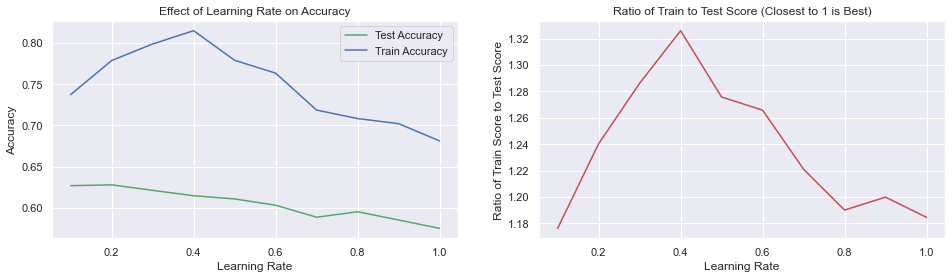

In [1590]:
ratio_learnrate = []

for i in range(len(test_scores_learningrate)):
    ratio_learnrate.append(train_scores_learningrate[i]/test_scores_learningrate[i])

# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(learning_rates,test_scores_learningrate,'-g',label='Test Accuracy')
ax1.plot(learning_rates,train_scores_learningrate,'-b',label='Train Accuracy')
ax1.set(xlabel='Learning Rate',ylabel='Accuracy')
ax1.set_title('Effect of Learning Rate on Accuracy')
ax1.legend()
ax2.plot(learning_rates,ratio_learnrate,'-r')
ax2.set(xlabel='Learning Rate',ylabel='Ratio of Train Score to Test Score')
ax2.set_title('Ratio of Train to Test Score (Closest to 1 is Best)')
plt.show()

With subsample 0.5, a varying learning rate lower than 1.0 is still overfitting and does not increase the test accuracy. 

In [1551]:
test_accuracy_n = []
train_accuracy_n = []
n_estimators_list = np.arange(100,2000,100)
for n_estimators in n_estimators_list:
    params = {'learning_rate': .1,
          'max_depth':2,
          'loss': 'deviance',
          'max_features': 'sqrt',
          'n_estimators': n_estimators,
          'subsample': 0.5}
    print('-'*40)
    print('Estimator Number = {}'.format(n_estimators))
    print('-'*40)
    train_score_n,test_score_n = run_boost_model(X,Y,params)
    test_accuracy_n.append(test_score_n)
    train_accuracy_n.append(train_score_n)
    print('\n')

----------------------------------------
Estimator Number = 100
----------------------------------------
Train Accuracy: 0.6411965716206375
Test Accuracy: 0.6224164006049403
--------------------
Precision: 0.6370967741935484
--------------------
Recall: 0.5803005008347245


----------------------------------------
Estimator Number = 200
----------------------------------------
Train Accuracy: 0.6608033163408212
Test Accuracy: 0.6259452192908754
--------------------
Precision: 0.6344405594405594
--------------------
Recall: 0.6058430717863105


----------------------------------------
Estimator Number = 300
----------------------------------------
Train Accuracy: 0.6722312475491569
Test Accuracy: 0.6256931608133087
--------------------
Precision: 0.63610569249867
--------------------
Recall: 0.5988313856427379


----------------------------------------
Estimator Number = 400
----------------------------------------
Train Accuracy: 0.6818105428267324
Test Accuracy: 0.6249369853806083
---

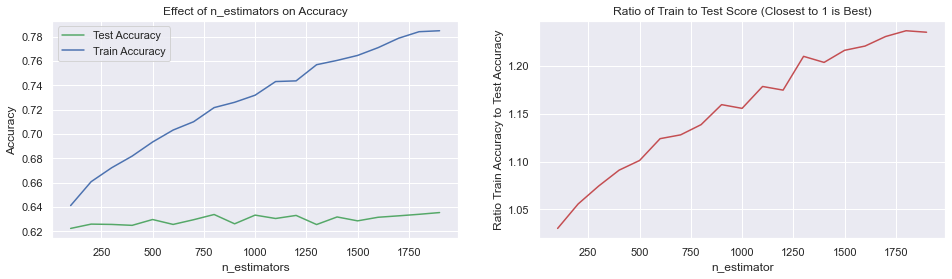

In [1591]:
ratio_n = []

for i in range(len(test_accuracy_n)):
    ratio_n.append(train_accuracy_n[i]/ test_accuracy_n[i])

# Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(n_estimators_list,test_accuracy_n,'-g',label='Test Accuracy')
ax1.plot(n_estimators_list,train_accuracy_n,'-b',label='Train Accuracy')
ax1.set(xlabel='n_estimators',ylabel='Accuracy')
ax1.set_title('Effect of n_estimators on Accuracy')
ax1.legend()
ax2.plot(n_estimators_list,ratio_n,'-r')
ax2.set(xlabel='n_estimator',ylabel='Ratio Train Accuracy to Test Accuracy')
ax2.set_title('Ratio of Train to Test Score (Closest to 1 is Best)')
plt.show()

Unfortunately the Gradient Boosting Model does not appear to be the choice model for this task. 

## Best Model 

The Logistic Regression model, with a newton-cg solver and no penalty is best model. Considering this model will be used to develop a browser app for identifying negative tweets on the internet, and it does no harm necessarily to misidentify positive tweets as negative tweets, because that just means that positive messaging and mental health resources could be presented to people.

As far as the data goes, if the tweet is classified as a '4', it means that the sentiment of the tweet is positive. If the tweet is classfied as a '0', it is a negative sentiment. The '4' will be considered the positive class to plot the ROC in this following section. 

In order to ensure that all the negative tweets are considered in determining what messaging the "Well-Widget" will present, we want to minimize the false positives, which essentially means maximize precision. We will therefore adjust the threshold such that there are no or at least few false negatives.

### Comparing Models

This plot below will take the "best" scores for the three classifier models attempted and compare them visually. For Random Forest, the best models used are the modesl with the parameters found from the Grid Search Cross Validation. 

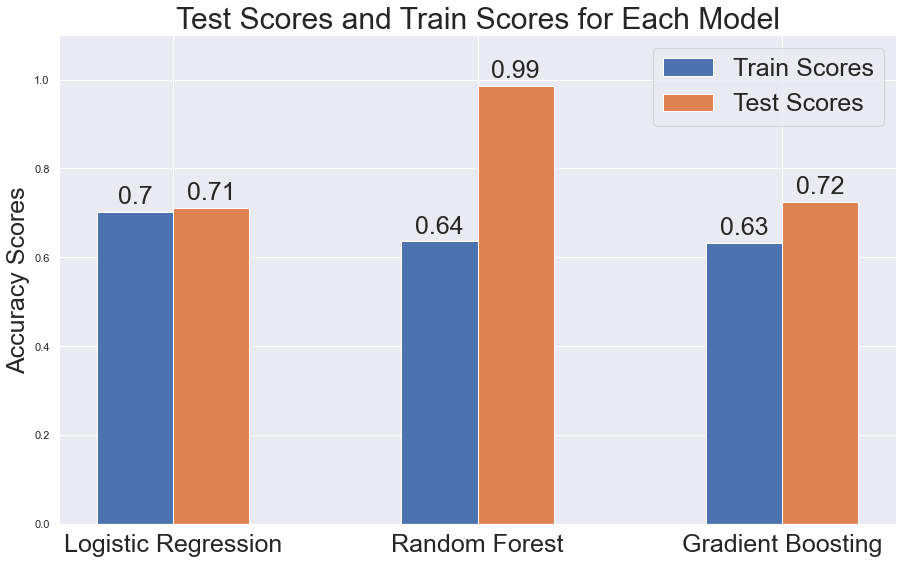

In [1811]:
# Plotting the Testing Scores per Feature Set to a Bar Chart for Visual Comparison

labels = ['Logistic Regression','Random Forest','Gradient Boosting']
test_scores = [0.70177010979162,0.6361192023302711,0.632198073045037]
train_scores = [0.711720362990349,0.9864118692082393,0.724732318624862]

x = np.arange(len(labels)) # Label Locations
width = 0.25 # Width of the bars


fig,ax = plt.subplots(figsize=(15,9))
rects1 = ax.bar(x - width/2, test_scores,width,label='Test Scores')
rects2 = ax.bar(x + width/2, train_scores,width,label='Train Scores')

# Add some Text for Labels, Title, and Custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Scores',fontsize=25)
ax.set_title('Test Scores and Train Scores for Each Model',fontsize=30)
ax.set_xticks(x)
ax.set_ylim(0,1.1)
ax.set_xticklabels(labels,fontsize=25)
ax.legend()

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height,2)),
                xy=(rect.get_x() + rect.get_width() /2,height),
                xytext = (0,3), # 3 points vertical offset
                fontsize=25,
                textcoords = 'offset points',
                ha='center',va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.legend(['Train Scores','Test Scores'],fontsize=25)

plt.show()

This plot outlines that the Logistic Regression is the model with the leas overfitting and the highest test score. We'll absolutely move forward with the model for the beta version of this app. 

### Analyizing Results and Maximizing Precision

In [1798]:
lr = LogisticRegression(solver='newton-cg',max_iter=100000,random_state=123,penalty='none')
cmtrain,cmtest= run_evaluate_model(lr,X,Y)

Scores on Training Data:
--------------------
Accuracy: 0.711720362990349
Precision: 0.7060545952583357
Recall: 0.7210379087489148
----------------------------------------
Scores on Test Data:
--------------------
Accuracy: 0.70177010979162
Precision: 0.7021230028452615
Recall: 0.711465956974939
----------------------------------------


Normalized Confusion Matrix


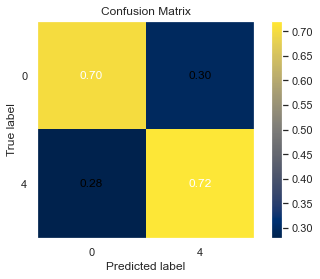

In [1814]:
plot_confusion_matrix(cmtrain,['0','4'],normalize=True)

Normalized Confusion Matrix


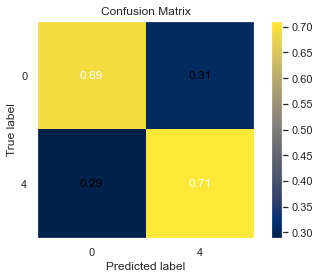

In [1815]:
plot_confusion_matrix(cmtest,['0','4'],normalize=True)

#### Probabilities

In [1593]:
probs = lr.predict_proba(X_test)[:, 1]
predictions = lr.predict(X_test)
probs

array([0.62708951, 0.52139576, 0.16328352, ..., 0.11309398, 0.75731655,
       0.52462878])

In [1621]:
predictions_df = pd.DataFrame({'model_preds':predictions,'probs':probs})
predictions_df.head()

,model_preds,probs
0,4,0.627090
1,4,0.521396
2,0,0.163284
3,0,0.055039
4,0,0.428505


#### ROC Curve and Precision-Recall

In [1599]:
fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label=4)

In [1616]:
thresh_df = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresholds':thresholds})
thresh_df.head()

,fpr,tpr,thresholds
0,0.000000,0.000000,1.999378
1,0.000000,0.003548,0.999378
2,0.000226,0.003548,0.998986
3,0.000226,0.004214,0.997783
4,0.000226,0.004657,0.997622


In [1617]:
thresh_df.loc[thresh_df.thresholds <.751].loc[thresh_df.thresholds >.749]

,fpr,tpr,thresholds
427,0.052524,0.275449,0.750971
428,0.052524,0.276558,0.749717
429,0.052751,0.276558,0.749703
430,0.052751,0.277223,0.749497
431,0.052977,0.277223,0.749376
432,0.052977,0.277445,0.749351
433,0.053430,0.277445,0.749159
434,0.053430,0.277667,0.749135
435,0.053656,0.277667,0.749097


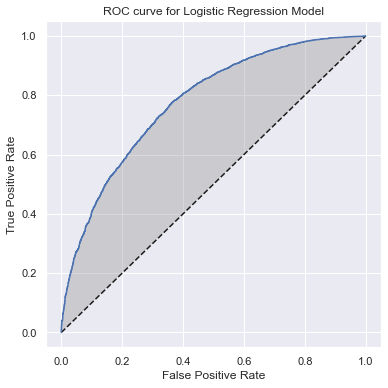

In [1577]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [1578]:
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

Area under the ROC curve: 0.777


An AUC of ~78% is not too bad! 

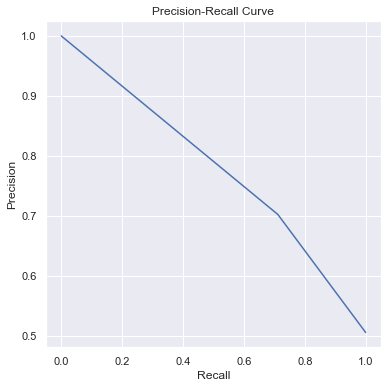

In [1579]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions,pos_label=4)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

It's clear that anything above the 0.5 threshold is characterized as 4, the "positive class", or positive sentiment in the tweet, and anything below 0.5 is characterized as 0, the "negative class", or a negative sentiment.

We can therefore set the threshold higher, such as 0.7, which would set the false positive rate at 0.7, which will put the false positive rate at 0.08 and the true positive rate at 0.36. But most importantly, it would set the precision at ~81%, which is a great place to start.

In the DataFrame we'll create a new column called "actual_preds" where we will program in the predictions with the threshold 0.7. 

In [1655]:
predictions_df['actual_preds'] = [np.nan]*predictions_df.shape[0]
predictions_df.head()

,model_preds,probs,actual_preds
0,4,0.627090,NaN
1,4,0.521396,NaN
2,0,0.163284,NaN
3,0,0.055039,NaN
4,0,0.428505,NaN


In [1671]:
for i in range(0,len(predictions_df)-1):
    if predictions_df.loc[i,'probs'] < 0.7:
        predictions_df.loc[i,'actual_preds'] = int(0)
    else:
        predictions_df.loc[i,'actual_preds'] = int(4)

In [1672]:
predictions_df.model_preds.value_counts()

4    4569
0    4357
Name: model_preds, dtype: int64

In [1673]:
predictions_df.actual_preds.value_counts()

0.0    6930
4.0    1995
Name: actual_preds, dtype: int64

#### Dummy Report

While an accuracy of 70% is reasonable, and maximizing the precision gets us closer to a viable product in making sure we capture all online negativity, but it's still interesting to see if our classifier model is performing better than a dummy classifier

In [1674]:
report = classification_report(y_test, predictions, target_names=['0', '4'])
print(report)

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      4417
           4       0.70      0.71      0.71      4509

    accuracy                           0.70      8926
   macro avg       0.70      0.70      0.70      8926
weighted avg       0.70      0.70      0.70      8926



In [1675]:
dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.49540667712301145

In [1676]:
dummy_report = classification_report(y_test, dummy.predict(X_test), target_names=['0', '4'])
print(dummy_report)

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      4417
           4       0.51      0.49      0.50      4509

    accuracy                           0.50      8926
   macro avg       0.50      0.50      0.50      8926
weighted avg       0.50      0.50      0.50      8926



I'm super glad to see that our classifier model is performing much better than a dummy classifier! 

### Deploying and Demonstrating the Model

The whole idea behind the Well-Widget is that it "scans" (or more like scrapes) the content of a page and analyzes the content, be it comments, tweets, or posts, in order to determine whether the content is positive or negative, and displays content on a side bar accordingly. 

There will be different levels and ubiquitous content, from quotes to journal prompts to links to articles about life, perspectives, and overall holistic mental health (think mental flossing). 

When there is too much negative content (bullying, negativity, attacks), the content will be more assertive regarding resources for mental health and links to online counseling resources such as Better Help. 

The intial tiers will be:

- Tier 1: 0-25% of the content on the page is negative:
- Tier 2: 25-50% of the content on the page is negative
- Tier 3: 50-75% of the content on page is negative
- Tier 4: More than 75% of the content on the page is negative. 

These tiers will be adjusted with user feedback. The content and messaging within each tier will be developed later on in conjunction with a psychologist. 

**Demonstrating the Model**

In order to demonstrate the model, I will use the test set provided by the Stanford researchers who provided the training data set. 

In [1788]:
# Obtain data
# Before deployment this step will be compiled from web scraping or a social media API
test_data = pd.read_csv('testdata.manual.2009.06.14.csv',names=['0','1','2','3','4','5'])

# Clean the textual data
remove_idxs = []
for i,tweet in enumerate(test_data['5']):
    try:
        tweet_words = test_data.loc[i,'5'].split(sep=' ')
        
        for word in tweet_words:
            if '@' in word:
                tweet_words.remove(word)
            elif '-' in word:
                tweet_words.remove(word)
            elif 'http' in word:
                tweet_words.remove(word)
    
        cleaned_words = []
        for word in tweet_words:
            cleaned_words.append(word.replace('#',''))
    
        final_string = convert_emoticons(' '.join(cleaned_words)).strip()
    
        test_data.loc[i,'5'] = final_string.strip()
    
    except ValueError:
        print('Value Error at Index {}'.format(i))
        remove_idxs.append(i)
        continue

for i in range(len(test_data)-1):
    test_data.loc[i,'5'] = re.sub(r"&lt;3", "love ", test_data.loc[i,'5'])
    test_data.loc[i,'5'] = re.sub(r"½|¿|ï|&quot;|~|â|«|&lt;a&gt;", "", test_data.loc[i,'5'])
    test_data.loc[i,'5'] = re.sub(r"xxxx", " ", test_data.loc[i,'5'])
    test_data.loc[i,'5'] = re.sub(r"&amp;", " and ", test_data.loc[i,'5'])
    test_data.loc[i,'5'] = re.sub(r"Â´", "'", test_data.loc[i,'5'])
    test_data.loc[i,'5'] = re.sub(r"PokÃ©mon", "Pokemon", test_data.loc[i,'5'])
    test_data.loc[i,'5'] = test_data.loc[i,'5'].replace('...',' ')

for i in range(len(test_data)-1):
    
    if 'Ð' in test_data.loc[i,'5']:
        remove_idxs.append(i)


test_data = test_data.drop(remove_idxs,axis=0).reset_index()

for i,tweet in enumerate(test_data['5']):
    
    word_list = tweet.split()
    
    cleaned_words = []
    for word in word_list:
        if '@' not in word:
            if 'http' not in word:
                if 'www' not in word:
                    cleaned_words.append(word)
    
    final_string = ' '.join(cleaned_words)
    
    test_data.loc[i,'5'] = final_string

# Process the textual data
processed_model_text = []
for i,tweet in enumerate(test_data['5']):
    tweet_doc = nlp(tweet)
    tweet_doc_no_punct_no_stop = [token.lemma_ for token in tweet_doc if not token.is_punct and not token.is_stop]
    final_tweet = []
    for token in tweet_doc_no_punct_no_stop:
        if len(token) > 1:
            if '.com' not in token:
                final_tweet.append(token.lower())
    processed_model_text.append(final_tweet)
    
test_data['model_text'] = processed_model_text

test_data['rating'] = test_data['0']
test_data['tweet_id'] = test_data['1']
test_data['og_text'] = test_data['5']
test_data.drop(['index','0','1','2','3','4','5'],axis=1,inplace=True)

# Vectorize the textual data 
model = gensim.models.Word2Vec(
    data_for_spacy["model_text"],
    workers=4, # set number of threads in parallel to 4
    min_count=1, # set the min word count threshold to 1
    window=4, # set the number of words around the target to consider to be 6
    sg=0, # use cbow because the corpus is small
    sample=1e-3, # penalize frequent words
    size=300, # set the word vector length to 300
    hs=1
)

word2vec_arr = np.zeros((test_data.shape[0],300))

# It's possible if not probably that SpaCy will encounter vocabulary it does not recognize
# Therefore these data points will be removed for now
# In the future, it's possible that the model will be run with
# text that has been manually processed as in the beginning of this notebook
remove_idxs = []
for i, sentence in enumerate(test_data['model_text']):
    try:
        word2vec_arr[i,:] = np.mean([model[lemma] for lemma in sentence],axis=0)
    except KeyError:
        remove_idxs.append(i)
        continue

test_data = test_data.drop(remove_idxs,axis=0).reset_index()

word2vec_arr = pd.DataFrame(word2vec_arr)
test_data = pd.concat([test_data[['rating','tweet_id','og_text','model_text']],word2vec_arr],axis=1)
test_data.dropna(inplace=True) 

# Determining the features to be fed into the model
X_test = test_data.drop(['rating','tweet_id','og_text','model_text'], 1)

# Instantiate the model
lr = LogisticRegression(solver='newton-cg',max_iter=100000,random_state=123,penalty='none')

# Predict the classification and determine probabilities
probs = lr.predict_proba(X)[:, 1]
predictions = lr.predict(X)

# Create the DataFrame with model predictions, probabilities, and an empty column for actual_preds
predictions_df = pd.DataFrame({'model_preds':predictions,'probs':probs,'actual_preds':[0]*len(predictions)})

# Create a loop that will re-classify the model predictions based on a threshold of 0.7
for i in range(0,len(predictions_df)-1):
    if predictions_df.loc[i,'probs'] < 0.7:
        predictions_df.loc[i,'actual_preds'] = int(0)
    else:
        predictions_df.loc[i,'actual_preds'] = int(4)

# Count the negative and the positive tweets
neg_tweets = predictions_df.actual_preds.value_counts(sort=False).values[0]
pos_tweets = predictions_df.actual_preds.value_counts(sort=False).values[1]

# Calculate the ratios that will determine the tier
neg_tweets_percentage = neg_tweets /(neg_tweets + pos_tweets)

# Output the tier that will determine the content of the Well-Widget App/Sidebar
if neg_tweets_percentage < .25:
    print('Tier 1')
elif .25 <= neg_tweets_percentage < .5:
    print('Tier 2')
elif .5 <= neg_tweets_percentage < .75:
    print('Tier 3')
else: 
    print('Tier 4')

Tier 1


Tier 1! Hurray! 

It appears that in this test data there is a majority of positive sentiment tweets. Hopefully whoever is on this social media page is experiencing a good mental health status, or at least if they're not, it's not because of the content on this social media page. 

This, in one cell block, is ultimately the code behind the app. It outputs which Tier the app is in based on the text on the social media page. 

### Moving Forward

This model is only the beta version! There's lots of growth that could occur, both in bettering the model and deploying it. The following checkpoints will outline a "to-do" list for each aspect.

**Model Optimization**
- Train the model with the additional data that was cut out of the initial model. I will be able to identify which data was used and which was not as I preserved the "tweet ID" column in the model data. 
- Further optimize the model and experiment with other less common classifiers
- More effectively clean the data, there were certainly still misspellings although I believe word2vec helps with this quite a bit

**Model Deployment**
- Research and employ the best API and/or method to scrape text and comments from social media websites, ensure that this is done legally and ethically
- Partner with a psychologist to determine that each tier contains appropriate data
- Partner with a web/ browser app developer create the widget
- Market the widget for free, obtain investors based on the profit potential of advertisements for online counseling resources, etc. 